In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

random_state=26

# Loading and subsampling data

In [ ]:
# Load the dataset to understand its structure and contents
accident_file_path = 'data/Accident_Information.csv'
vehicle_file_path = 'data/Vehicle_Information.csv'
accident_data = pd.read_csv(accident_file_path, encoding='unicode_escape')
vehicle_data = pd.read_csv(vehicle_file_path, encoding='unicode_escape')

# Display the first few rows of the dataset to get an overview
accident_data.head()

/tmp/ipykernel_8040/1076682411.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_data = pd.read_csv(accident_file_path, encoding='unicode_escape')


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


In [ ]:
vehicle_data.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [ ]:
print(accident_data.shape, vehicle_data.shape)

(2047256, 34) (2177205, 24)


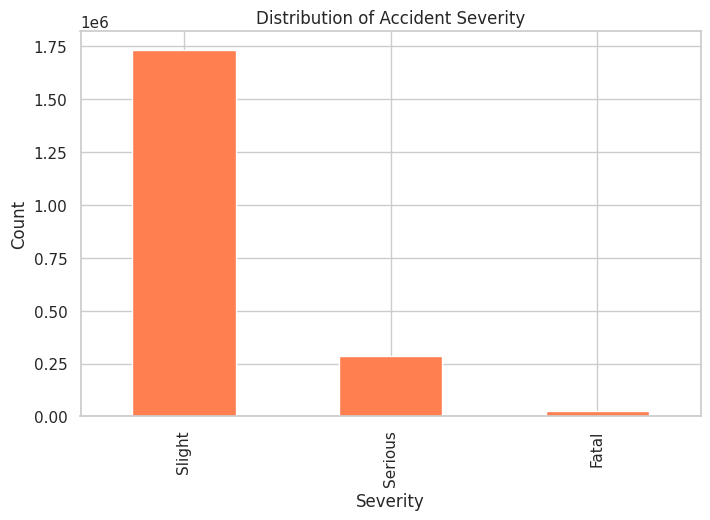

In [ ]:
# As the dataset is too large, let's reduce its size by subsampling
# Firstly, we'll look at distribution of accident severity
accident_severity_distribution = accident_data['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 5))

accident_severity_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [ ]:
# Creating weights for sampling so that the final dataset includes all severity types
weights = np.where(accident_data['Accident_Severity'] == 'Slight', 0.25, 0.75)

# Sampling 10% of the data with new weights
accident_data_small = accident_data.sample(frac=0.1, weights=weights)
print(accident_data_small.shape)

(204726, 34)


In [ ]:
# Now we can merge the tables with accident info and driver info
# joining tables on Accident_Index
accident_df = pd.merge(accident_data_small, vehicle_data, on="Accident_Index", how="inner")
print(accident_df.shape)
accident_df.head()

(203194, 57)


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,201145TA62218,B,269.0,NaN,0.0,Slight,None,2011-06-30,Thursday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Parked,1,Car,No,Offside,2011
1,201145TA62218,B,269.0,NaN,0.0,Slight,None,2011-06-30,Thursday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Front,2011
2,20053102A0020,Unclassified,0.0,Unclassified,0.0,Fatal,None,2005-01-04,Tuesday,1.0,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200714H241407,A,6135.0,NaN,0.0,Serious,Other object on road,2007-12-19,Wednesday,1.0,...,Skidded,No tow/articulation,Offside,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Did not impact,2007
4,201331C074013,A,6514.0,Unclassified,0.0,Serious,None,2013-05-09,Thursday,2.0,...,None,No tow/articulation,Did not leave carriageway,5.0,Reversing,2,Car,No,Did not impact,2013


In [ ]:
# Saving final dataset
accident_df.to_csv('data/small_merged_dataset_.csv', index=False)

In [ ]:
# Loading final dataset
accident_df = pd.read_csv('data/small_merged_dataset_.csv')
print(accident_df.shape)
accident_df.head()

(203194, 58)


,Unnamed: 0,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,0,201145TA62218,B,269.0,NaN,0.0,Slight,None,2011-06-30,Thursday,...,None,No tow/articulation,Did not leave carriageway,0.0,Parked,1,Car,No,Offside,2011
1,1,201145TA62218,B,269.0,NaN,0.0,Slight,None,2011-06-30,Thursday,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,Car,No,Front,2011
2,2,20053102A0020,Unclassified,0.0,Unclassified,0.0,Fatal,None,2005-01-04,Tuesday,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,3,200714H241407,A,6135.0,NaN,0.0,Serious,Other object on road,2007-12-19,Wednesday,...,Skidded,No tow/articulation,Offside,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Did not impact,2007
4,4,201331C074013,A,6514.0,Unclassified,0.0,Serious,None,2013-05-09,Thursday,...,None,No tow/articulation,Did not leave carriageway,5.0,Reversing,2,Car,No,Did not impact,2013


# Data Preproccessing

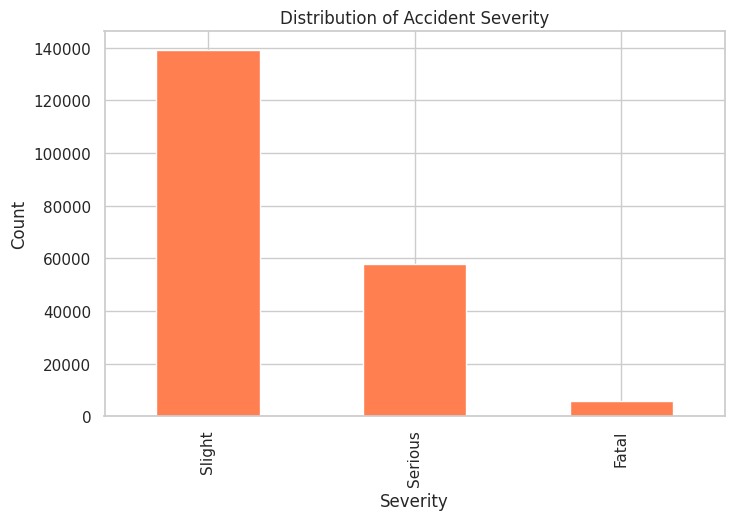

In [ ]:
# Distribution of accident severity
accident_severity_distribution = accident_df['Accident_Severity'].value_counts()

plt.figure(figsize=(8, 5))

accident_severity_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

Tha data is imbalanced, we should keep this in mind

In [ ]:
# General info
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203194 entries, 0 to 203193
Data columns (total 58 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Unnamed: 0                                   203194 non-null  int64  
 1   Accident_Index                               203194 non-null  object 
 2   1st_Road_Class                               203194 non-null  object 
 3   1st_Road_Number                              203194 non-null  float64
 4   2nd_Road_Class                               117658 non-null  object 
 5   2nd_Road_Number                              201238 non-null  float64
 6   Accident_Severity                            203194 non-null  object 
 7   Carriageway_Hazards                          203194 non-null  object 
 8   Date                                         203194 non-null  object 
 9   Day_of_Week                                  203194 non-nul

In [ ]:
# Null values
null_count = accident_df.isnull().sum()
null_count
# Let's take a closer look at the features with many missing values. Mb they turn out to be insignificant and we could drop them.

Unnamed: 0                                         0
Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 85536
2nd_Road_Number                                 1956
Accident_Severity                                  0
Carriageway_Hazards                                0
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident       14
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                          14
Light_Conditions                                   0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
Location_Easting_OSGR                             14
Location_Northing_OSGR                        

## Primary feature dropping

In [ ]:
# As a first step we'll look at categorical features and the number of unique values
uniques = accident_df.select_dtypes(exclude='number').nunique()
uniques

Accident_Index                 138405
1st_Road_Class                      6
2nd_Road_Class                      6
Accident_Severity                   3
Carriageway_Hazards                 7
Date                             4383
Day_of_Week                         7
Junction_Control                    6
Junction_Detail                    10
Light_Conditions                    6
Local_Authority_(District)        416
Local_Authority_(Highway)         207
LSOA_of_Accident_Location       29289
Police_Force                       51
Road_Surface_Conditions             6
Road_Type                           6
Special_Conditions_at_Site          9
Time                             1439
Urban_or_Rural_Area                 3
Weather_Conditions                 10
InScotland                          2
Age_Band_of_Driver                 12
Driver_Home_Area_Type               4
Hit_Object_in_Carriageway          13
Hit_Object_off_Carriageway         13
Journey_Purpose_of_Driver           8
Junction_Loc

In [5]:
# Deleting categorical features with many values as they are likely to be uninformative
accident_df.drop(columns=['Accident_Index','LSOA_of_Accident_Location', 'model'],inplace=True)

In [6]:
# There are different string values meaning missing data in the dataset. Let's replace such strings with np.nan
accident_df.replace(to_replace=['None', 'Data missing or out of range',
                                'Unknown', 'Unallocated', 'Not known',
                                'Other/Not known (2005-10)'], value=np.nan, inplace=True)

In [7]:
null_count = accident_df.isnull().sum()
null_count

Unnamed: 0                                          0
1st_Road_Class                                      0
1st_Road_Number                                     0
2nd_Road_Class                                  85536
2nd_Road_Number                                  1956
Accident_Severity                                   0
Carriageway_Hazards                            199738
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident        14
Junction_Control                                77206
Junction_Detail                                    22
Latitude                                           14
Light_Conditions                                    2
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                              14
Location_Northing_OSGR                             14
Longitude                   

In [8]:
null_count[null_count>1e5]

Carriageway_Hazards           199738
Special_Conditions_at_Site    198095
Hit_Object_in_Carriageway     194418
Hit_Object_off_Carriageway    183795
Journey_Purpose_of_Driver     138756
Skidding_and_Overturning      175021
dtype: int64

Features above are None for almost all samples in the dataset, so let's just delete them.

In [9]:
accident_df.drop(columns=['Carriageway_Hazards','Special_Conditions_at_Site', 'Hit_Object_in_Carriageway',
                          'Hit_Object_off_Carriageway', 'Skidding_and_Overturning', 'Journey_Purpose_of_Driver'],inplace=True)

Driver_IMD_Decile and Police_Force are relevant to UK only, so we can delete the column as we're solving a more general problem. 2nd_Road_Class has too many missing values, so let's delete this as well.

Also deleting 1st_Road_Number and 2nd_Road_Number, as they don't give meaningful information about the accident in general.

In [10]:
accident_df.drop(columns=['2nd_Road_Class','1st_Road_Number', '2nd_Road_Number',
                          'Driver_IMD_Decile', '1st_Road_Class', 'Police_Force'],inplace=True)

Deleting some other columns with information of no interest for us.

In [11]:
accident_df.drop(columns=['Unnamed: 0', 'Did_Police_Officer_Attend_Scene_of_Accident',
                          'Latitude', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
                          'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
                          'Year_x', 'InScotland', 'Year_y', 'Date', 'Time', 'make'],inplace=True)

## Dealing with missing values

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
# Imputing missing values in numerical columns with median values
numerical_cols = accident_df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
accident_df[numerical_cols] = imputer.fit_transform(accident_df[numerical_cols])

In [14]:
# Imputing missing values in categorical columns with the most frequent value in each column
categorical_cols = accident_df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')

accident_df[categorical_cols] = cat_imputer.fit_transform(accident_df[categorical_cols])

In [15]:
# Check null values
null_count = accident_df.isnull().sum()
null_count

Accident_Severity                          0
Day_of_Week                                0
Junction_Control                           0
Junction_Detail                            0
Light_Conditions                           0
Number_of_Casualties                       0
Number_of_Vehicles                         0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Road_Surface_Conditions                    0
Road_Type                                  0
Speed_limit                                0
Urban_or_Rural_Area                        0
Weather_Conditions                         0
Age_Band_of_Driver                         0
Age_of_Vehicle                             0
Driver_Home_Area_Type                      0
Engine_Capacity_.CC.                       0
Junction_Location                          0
Propulsion_Code                            0
Sex_of_Driver                              0
Towing_and_Articulation                    0
Vehicle_Le

In [16]:
accident_df.shape

(203194, 29)

## Categorical features

### Distributions

Let's see how numbers of samples representing each value of a category are distributed. Some of them are represented by too small number of samples in the dataset, we'll delete corresponding samples, as they only add noise to the data. Orr merge some types together.

In [17]:
categorical_cols

Index(['Accident_Severity', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Light_Conditions', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Age_Band_of_Driver', 'Driver_Home_Area_Type', 'Junction_Location',
       'Propulsion_Code', 'Sex_of_Driver', 'Towing_and_Articulation',
       'Vehicle_Leaving_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact'],
      dtype='object')

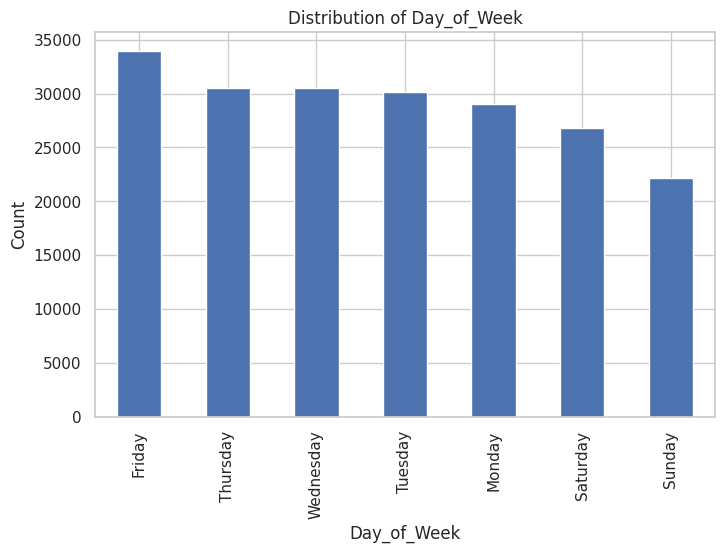

In [18]:
Day_of_Week_distribution = accident_df['Day_of_Week'].value_counts()

plt.figure(figsize=(8, 5))

Day_of_Week_distribution.plot(kind='bar')
plt.title('Distribution of Day_of_Week')
plt.xlabel('Day_of_Week')
plt.ylabel('Count')
plt.show()

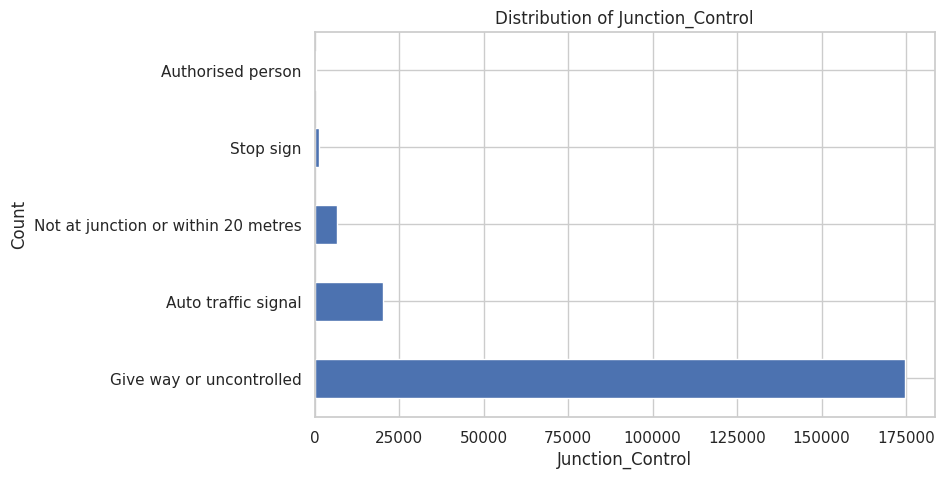

In [19]:
Junction_Control_distribution = accident_df['Junction_Control'].value_counts()

plt.figure(figsize=(8, 5))

Junction_Control_distribution.plot(kind='barh')
plt.title('Distribution of Junction_Control')
plt.xlabel('Junction_Control')
plt.ylabel('Count')
plt.show()

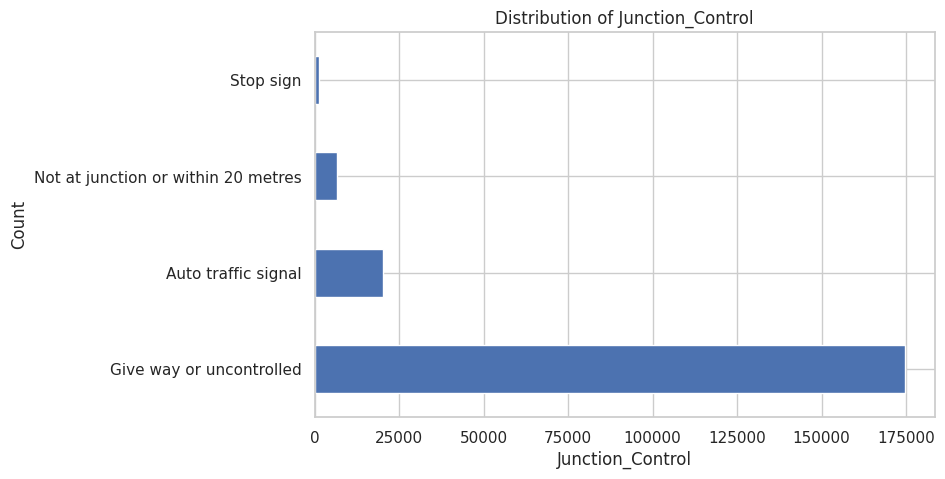

In [20]:
# 'Authorised person' value is an outlier.
accident_df.drop(accident_df[accident_df['Junction_Control'] == 'Authorised person'].index, inplace=True)

Junction_Control_distribution = accident_df['Junction_Control'].value_counts()

plt.figure(figsize=(8, 5))

Junction_Control_distribution.plot(kind='barh')
plt.title('Distribution of Junction_Control')
plt.xlabel('Junction_Control')
plt.ylabel('Count')
plt.show()

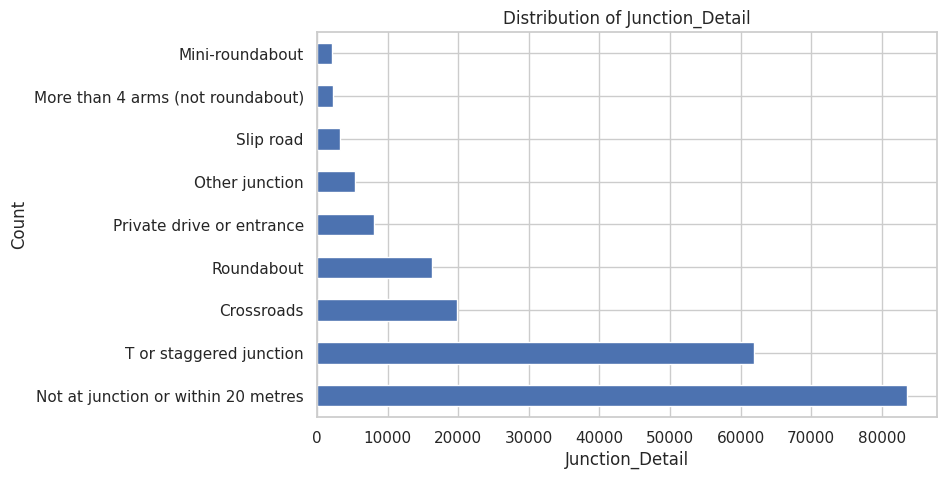

In [21]:
Junction_Detail_distribution = accident_df['Junction_Detail'].value_counts()

plt.figure(figsize=(8, 5))

Junction_Detail_distribution.plot(kind='barh')
plt.title('Distribution of Junction_Detail')
plt.xlabel('Junction_Detail')
plt.ylabel('Count')
plt.show()

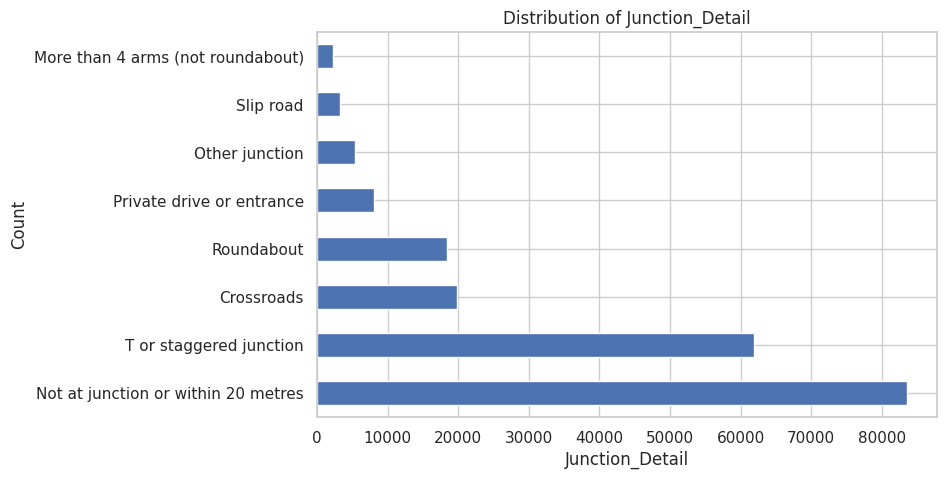

In [22]:
# There are few mini-roundabouts, so replacing them with roundabouts.
accident_df['Junction_Detail'].replace(to_replace=['Mini-roundabout'],
                                               value='Roundabout', inplace=True)

Junction_Detail_distribution = accident_df['Junction_Detail'].value_counts()

plt.figure(figsize=(8, 5))

Junction_Detail_distribution.plot(kind='barh')
plt.title('Distribution of Junction_Detail')
plt.xlabel('Junction_Detail')
plt.ylabel('Count')
plt.show()

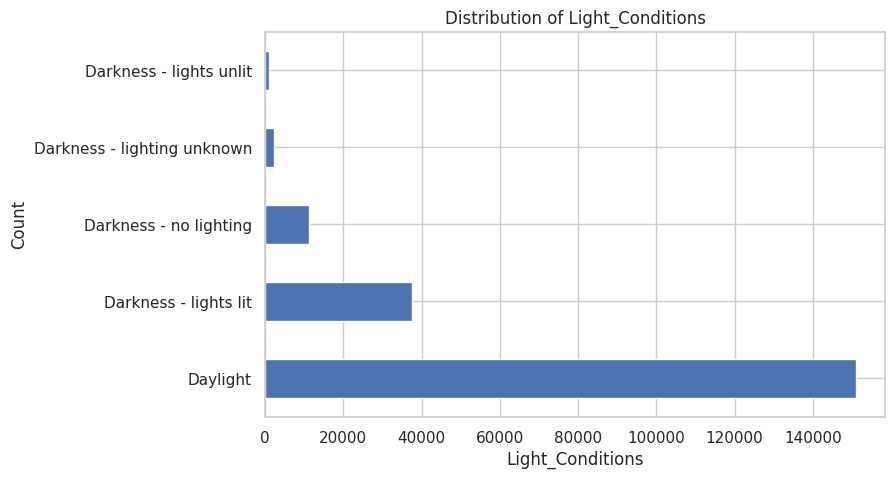

In [23]:
Light_Conditions_distribution = accident_df['Light_Conditions'].value_counts()

plt.figure(figsize=(8, 5))

Light_Conditions_distribution.plot(kind='barh')
plt.title('Distribution of Light_Conditions')
plt.xlabel('Light_Conditions')
plt.ylabel('Count')
plt.show()

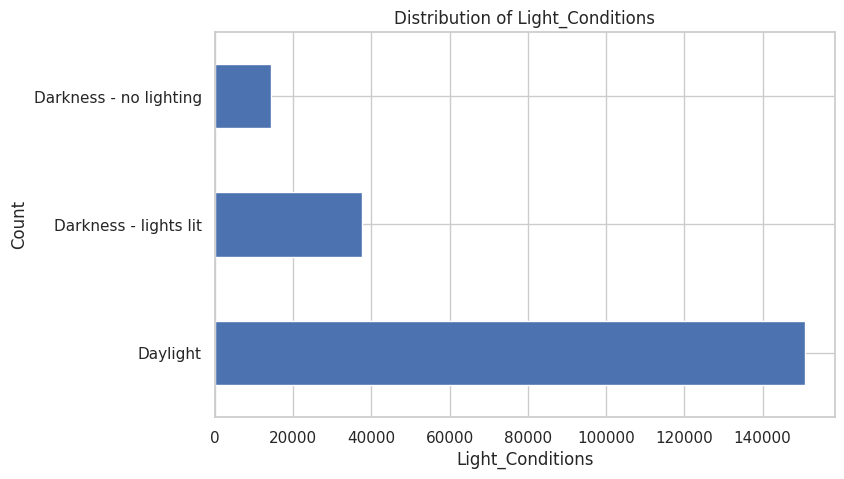

In [24]:
# Lights unlit and no lightning are basically the same for us. Let's also merge this with unknown lightning.
accident_df['Light_Conditions'].replace(to_replace=['Darkness - lights unlit', 'Darkness - lighting unknown'],
                                               value='Darkness - no lighting', inplace=True)

Light_Conditions_distribution = accident_df['Light_Conditions'].value_counts()

plt.figure(figsize=(8, 5))

Light_Conditions_distribution.plot(kind='barh')
plt.title('Distribution of Light_Conditions')
plt.xlabel('Light_Conditions')
plt.ylabel('Count')
plt.show()

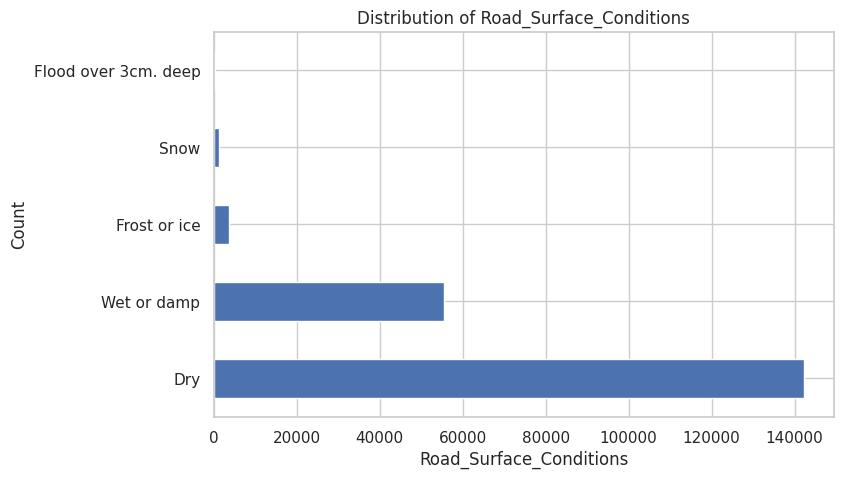

In [25]:
Road_Surface_Conditions_distribution = accident_df['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(8, 5))

Road_Surface_Conditions_distribution.plot(kind='barh')
plt.title('Distribution of Road_Surface_Conditions')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Count')
plt.show()

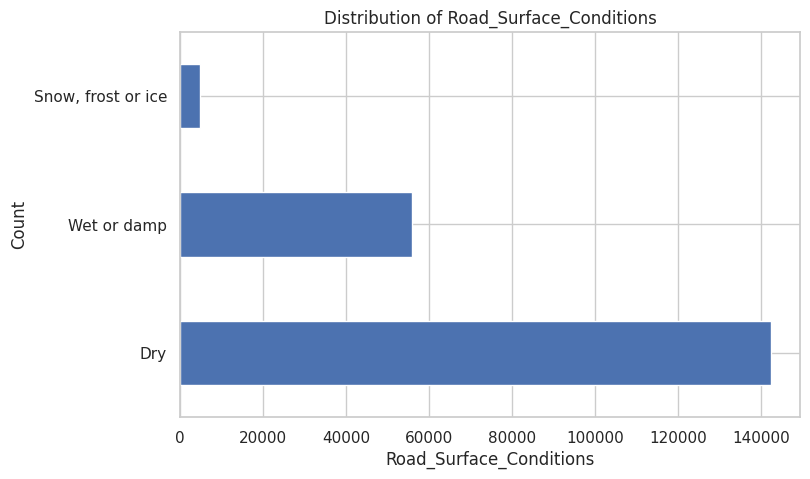

In [26]:
# 'Flood over 3cm. deep' value is an outlier, let's add this to group 'Wet or damp'.
#  Also let's merge 'Snow' and 'Frost or ice' types together.
accident_df['Road_Surface_Conditions'].replace(to_replace=['Flood over 3cm. deep'],
                                               value='Wet or damp', inplace=True)
accident_df['Road_Surface_Conditions'].replace(to_replace=['Frost or ice', 'Snow'],
                                               value='Snow, frost or ice', inplace=True)

Road_Surface_Conditions_distribution = accident_df['Road_Surface_Conditions'].value_counts()

plt.figure(figsize=(8, 5))

Road_Surface_Conditions_distribution.plot(kind='barh')
plt.title('Distribution of Road_Surface_Conditions')
plt.xlabel('Road_Surface_Conditions')
plt.ylabel('Count')
plt.show()

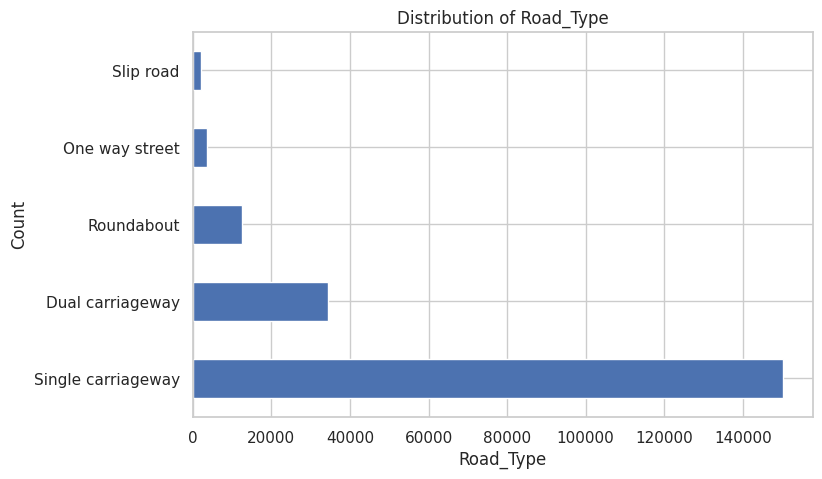

In [27]:
Road_Type_distribution = accident_df['Road_Type'].value_counts()

plt.figure(figsize=(8, 5))

Road_Type_distribution.plot(kind='barh')
plt.title('Distribution of Road_Type')
plt.xlabel('Road_Type')
plt.ylabel('Count')
plt.show()

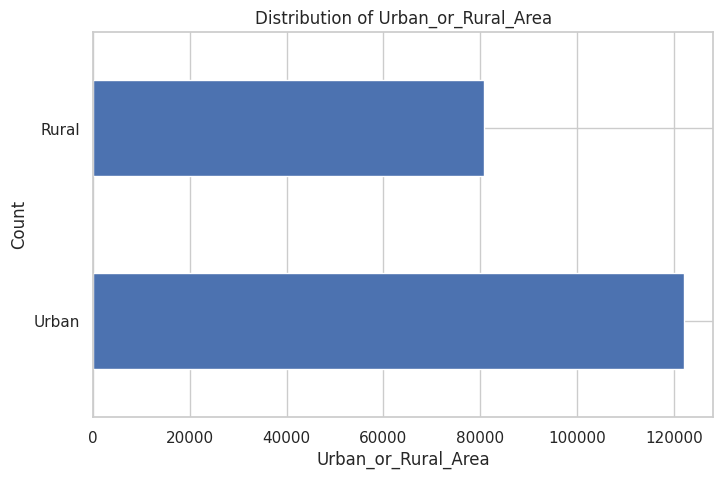

In [28]:
Urban_or_Rural_Area_distribution = accident_df['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(8, 5))

Urban_or_Rural_Area_distribution.plot(kind='barh')
plt.title('Distribution of Urban_or_Rural_Area')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Count')
plt.show()

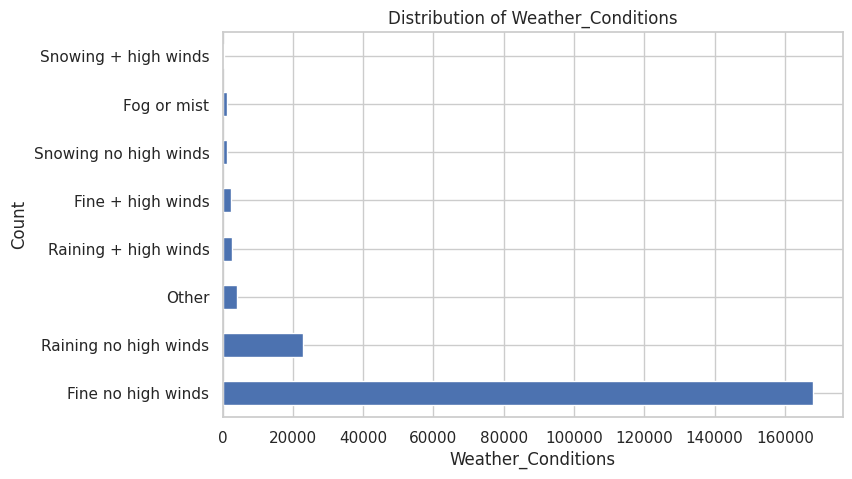

In [29]:
Weather_Conditions_distribution = accident_df['Weather_Conditions'].value_counts()

plt.figure(figsize=(8, 5))

Weather_Conditions_distribution.plot(kind='barh')
plt.title('Distribution of Weather_Conditions')
plt.xlabel('Weather_Conditions')
plt.ylabel('Count')
plt.show()

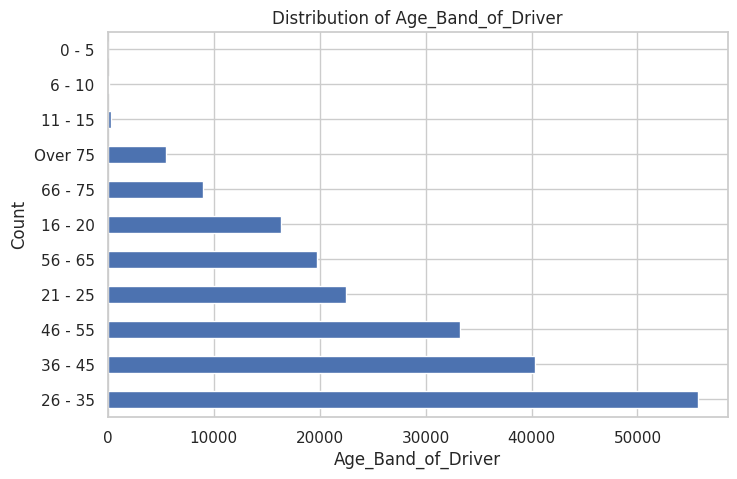

In [30]:
Age_Band_of_Driver_distribution = accident_df['Age_Band_of_Driver'].value_counts()

plt.figure(figsize=(8, 5))

Age_Band_of_Driver_distribution.plot(kind='barh')
plt.title('Distribution of Age_Band_of_Driver')
plt.xlabel('Age_Band_of_Driver')
plt.ylabel('Count')
plt.show()

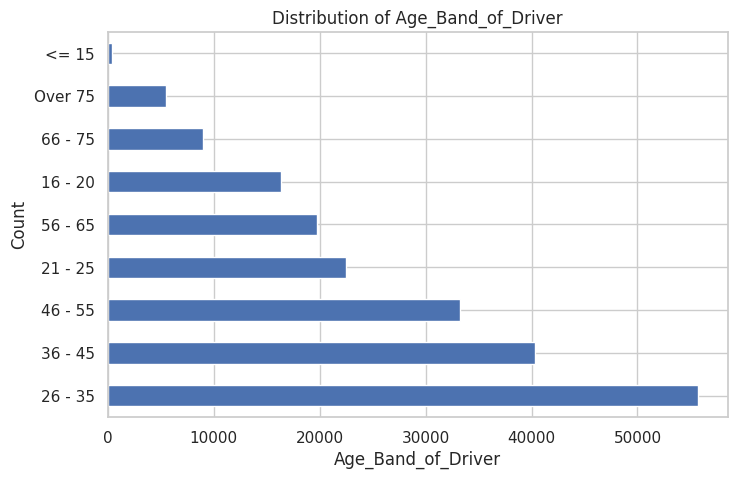

In [31]:
accident_df['Age_Band_of_Driver'].replace(to_replace=['0 - 5', '6 - 10', '11 - 15'],
                                               value='<= 15', inplace=True)

Age_Band_of_Driver_distribution = accident_df['Age_Band_of_Driver'].value_counts()

plt.figure(figsize=(8, 5))

Age_Band_of_Driver_distribution.plot(kind='barh')
plt.title('Distribution of Age_Band_of_Driver')
plt.xlabel('Age_Band_of_Driver')
plt.ylabel('Count')
plt.show()

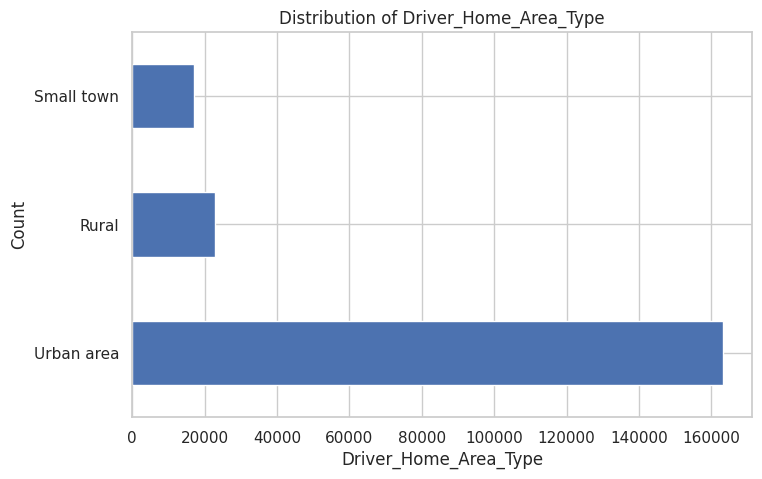

In [32]:
Driver_Home_Area_Type_distribution = accident_df['Driver_Home_Area_Type'].value_counts()

plt.figure(figsize=(8, 5))

Driver_Home_Area_Type_distribution.plot(kind='barh')
plt.title('Distribution of Driver_Home_Area_Type')
plt.xlabel('Driver_Home_Area_Type')
plt.ylabel('Count')
plt.show()

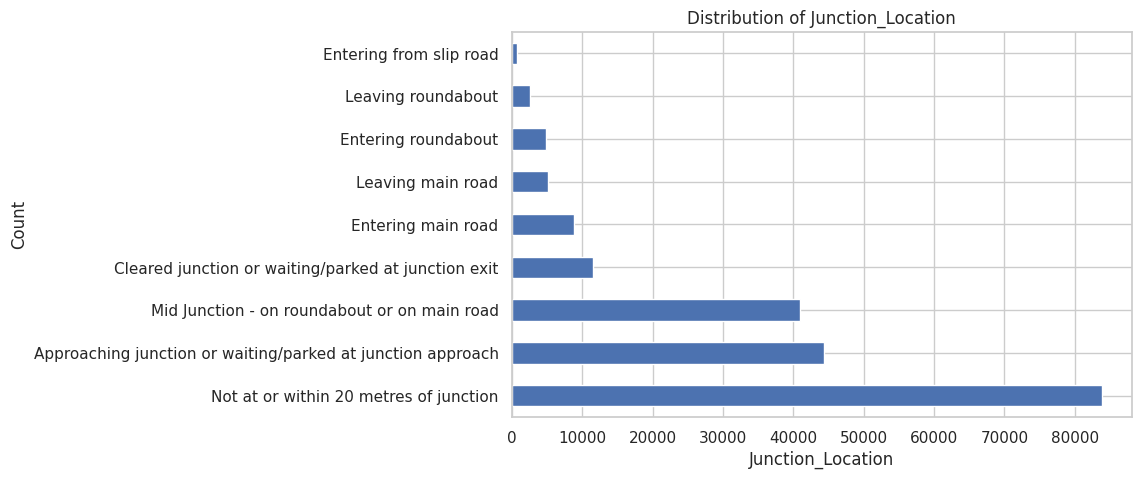

In [33]:
Junction_Location_distribution = accident_df['Junction_Location'].value_counts()

plt.figure(figsize=(8, 5))

Junction_Location_distribution.plot(kind='barh')
plt.title('Distribution of Junction_Location')
plt.xlabel('Junction_Location')
plt.ylabel('Count')
plt.show()

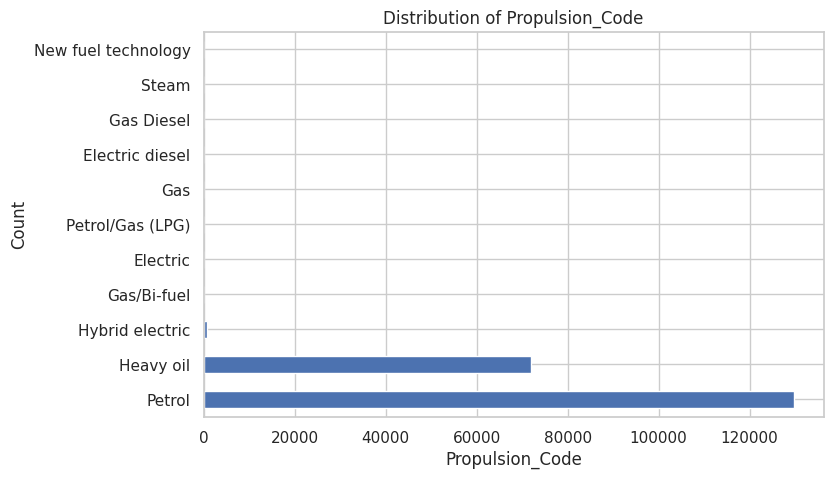

In [34]:
Propulsion_Code_distribution = accident_df['Propulsion_Code'].value_counts()

plt.figure(figsize=(8, 5))

Propulsion_Code_distribution.plot(kind='barh')
plt.title('Distribution of Propulsion_Code')
plt.xlabel('Propulsion_Code')
plt.ylabel('Count')
plt.show()

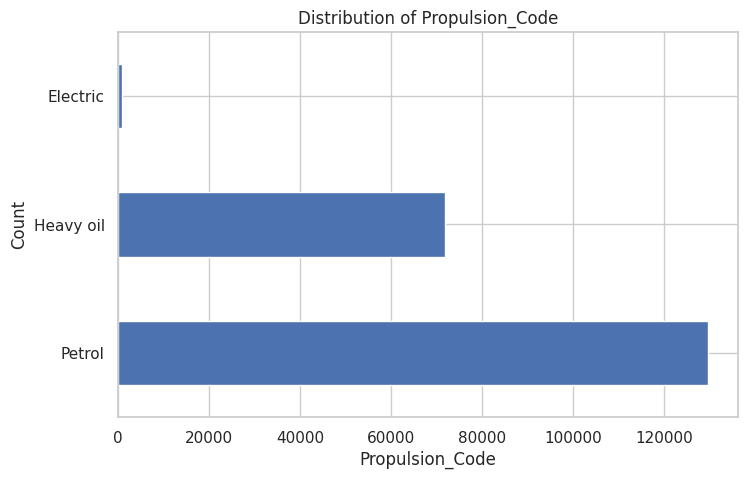

In [35]:
# There are many poorly represented types, so let's merge all electric fuel together.
# And delete other types as there are too few samples.
accident_df['Propulsion_Code'].replace(to_replace=['Electric', 'Hybrid electric', 'Electric diesel'],
                                               value='Electric', inplace=True)
accident_df['Propulsion_Code'].replace(to_replace=['Gas/Bi-fuel', 'Petrol/Gas (LPG)', 'Steam', 'Gas',
                                                   'Gas Diesel', 'New fuel technology'],
                                               value='Other', inplace=True)
accident_df.drop(accident_df[accident_df['Propulsion_Code'] == 'Other'].index, inplace=True)

Propulsion_Code_distribution = accident_df['Propulsion_Code'].value_counts()

plt.figure(figsize=(8, 5))

Propulsion_Code_distribution.plot(kind='barh')
plt.title('Distribution of Propulsion_Code')
plt.xlabel('Propulsion_Code')
plt.ylabel('Count')
plt.show()

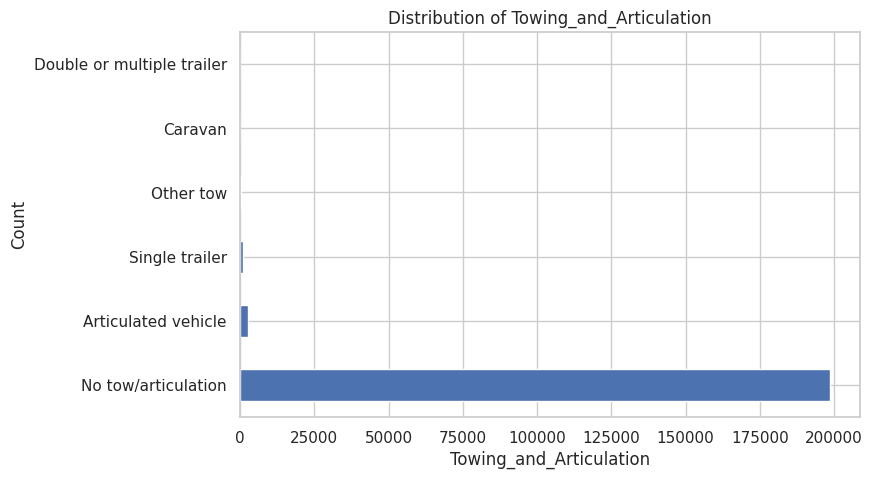

In [36]:
Towing_and_Articulation_distribution = accident_df['Towing_and_Articulation'].value_counts()

plt.figure(figsize=(8, 5))

Towing_and_Articulation_distribution.plot(kind='barh')
plt.title('Distribution of Towing_and_Articulation')
plt.xlabel('Towing_and_Articulation')
plt.ylabel('Count')
plt.show()

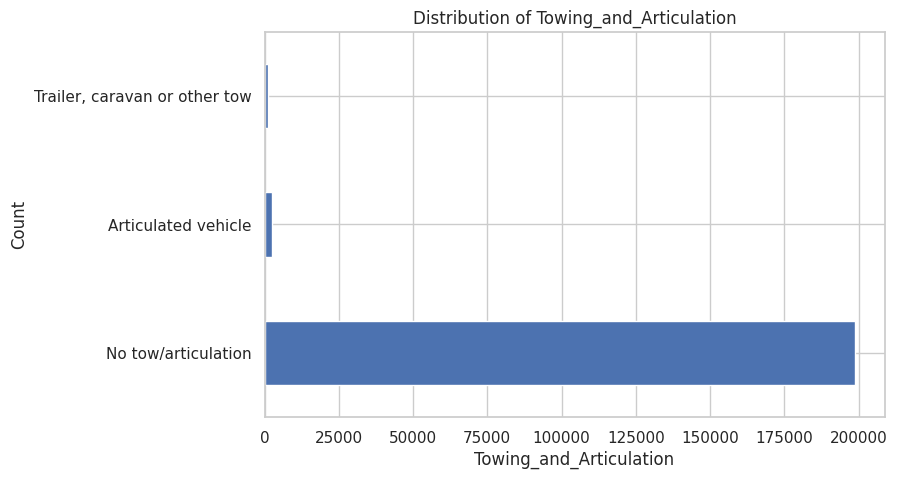

In [37]:
accident_df['Towing_and_Articulation'].replace(to_replace=['Single trailer', 'Other tow',
                                                           'Double or multiple trailer', 'Caravan'],
                                               value='Trailer, caravan or other tow', inplace=True)

Towing_and_Articulation_distribution = accident_df['Towing_and_Articulation'].value_counts()

plt.figure(figsize=(8, 5))

Towing_and_Articulation_distribution.plot(kind='barh')
plt.title('Distribution of Towing_and_Articulation')
plt.xlabel('Towing_and_Articulation')
plt.ylabel('Count')
plt.show()

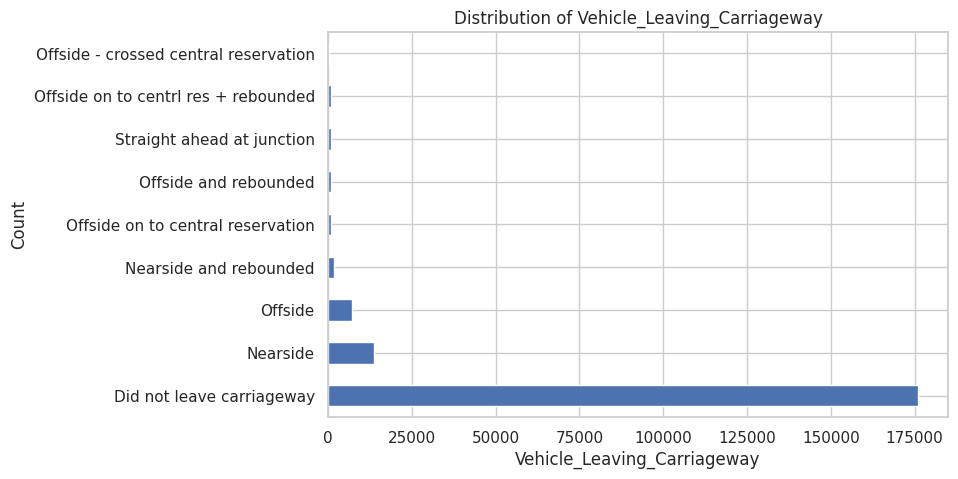

In [38]:
Vehicle_Leaving_Carriageway_distribution = accident_df['Vehicle_Leaving_Carriageway'].value_counts()

plt.figure(figsize=(8, 5))

Vehicle_Leaving_Carriageway_distribution.plot(kind='barh')
plt.title('Distribution of Vehicle_Leaving_Carriageway')
plt.xlabel('Vehicle_Leaving_Carriageway')
plt.ylabel('Count')
plt.show()

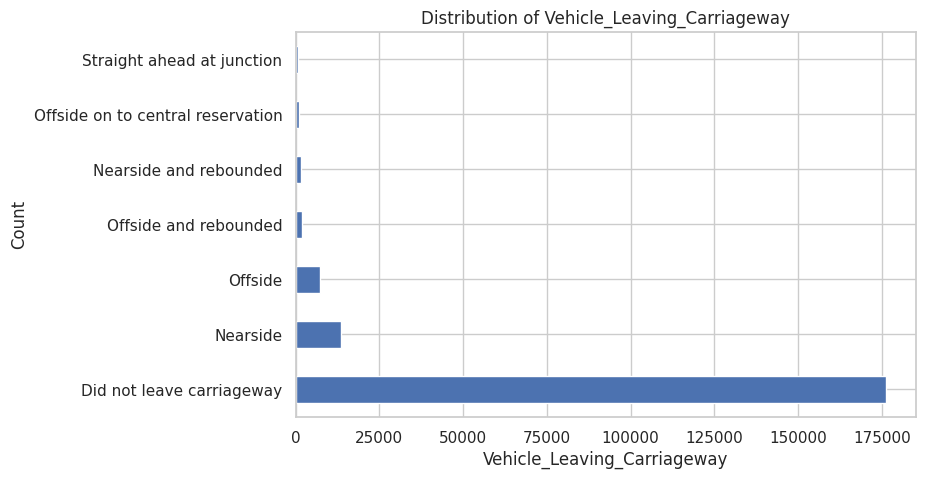

In [39]:
accident_df['Vehicle_Leaving_Carriageway'].replace(to_replace=['Offside - crossed central reservation',
                                                               'Offside on to centrl res + rebounded'],
                                               value='Offside and rebounded', inplace=True)

Vehicle_Leaving_Carriageway_distribution = accident_df['Vehicle_Leaving_Carriageway'].value_counts()

plt.figure(figsize=(8, 5))

Vehicle_Leaving_Carriageway_distribution.plot(kind='barh')
plt.title('Distribution of Vehicle_Leaving_Carriageway')
plt.xlabel('Vehicle_Leaving_Carriageway')
plt.ylabel('Count')
plt.show()

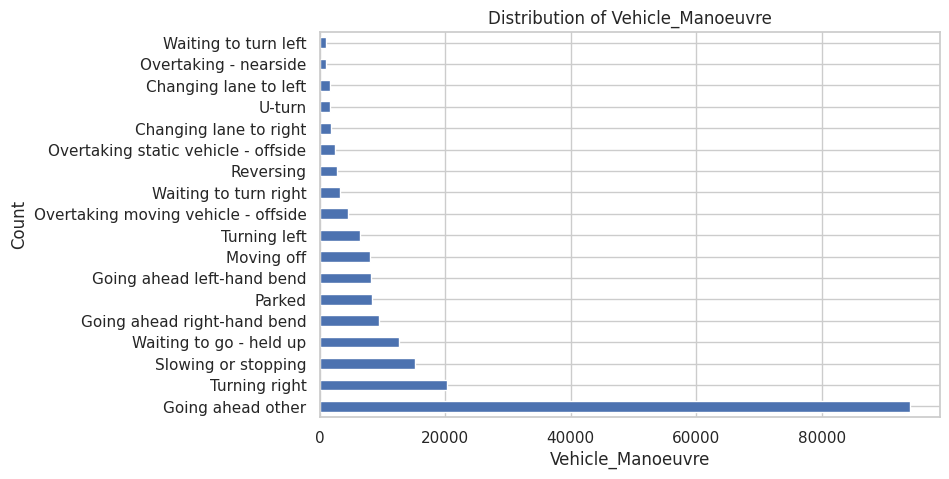

In [40]:
Vehicle_Manoeuvre_Carriageway_distribution = accident_df['Vehicle_Manoeuvre'].value_counts()

plt.figure(figsize=(8, 5))

Vehicle_Manoeuvre_Carriageway_distribution.plot(kind='barh')
plt.title('Distribution of Vehicle_Manoeuvre')
plt.xlabel('Vehicle_Manoeuvre')
plt.ylabel('Count')
plt.show()

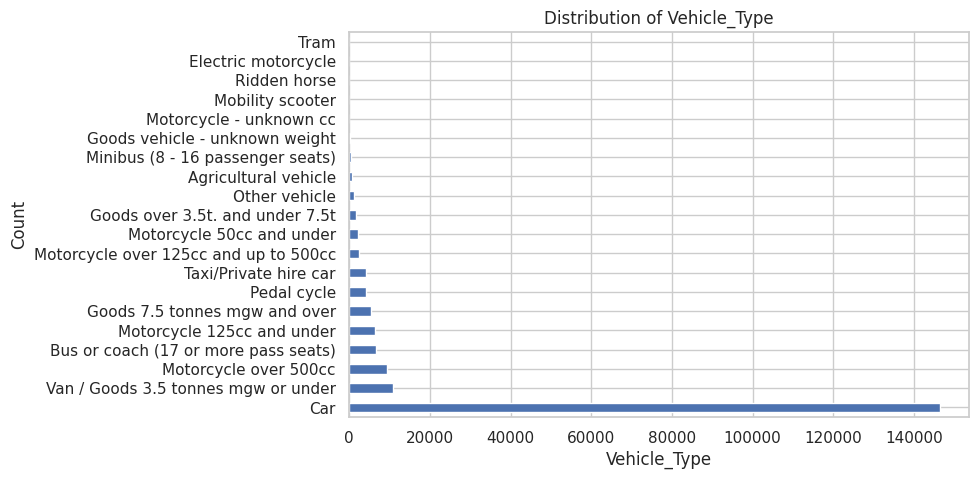

In [41]:
Vehicle_Type_distribution = accident_df['Vehicle_Type'].value_counts()

plt.figure(figsize=(8, 5))

Vehicle_Type_distribution.plot(kind='barh')
plt.title('Distribution of Vehicle_Type')
plt.xlabel('Vehicle_Type')
plt.ylabel('Count')
plt.show()

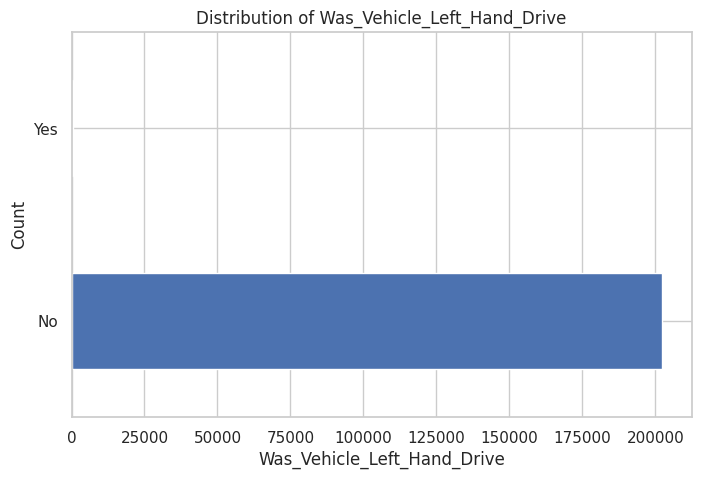

In [42]:
Was_Vehicle_Left_Hand_Drive_distribution = accident_df['Was_Vehicle_Left_Hand_Drive'].value_counts()

plt.figure(figsize=(8, 5))

Was_Vehicle_Left_Hand_Drive_distribution.plot(kind='barh')
plt.title('Distribution of Was_Vehicle_Left_Hand_Drive')
plt.xlabel('Was_Vehicle_Left_Hand_Drive')
plt.ylabel('Count')
plt.show()

In [43]:
Was_Vehicle_Left_Hand_Drive_distribution

No     202298
Yes       378
Name: Was_Vehicle_Left_Hand_Drive, dtype: int64

In [44]:
# This column is uninformative due to distribution, so let's delete it.
accident_df.drop(columns=['Was_Vehicle_Left_Hand_Drive'],inplace=True)

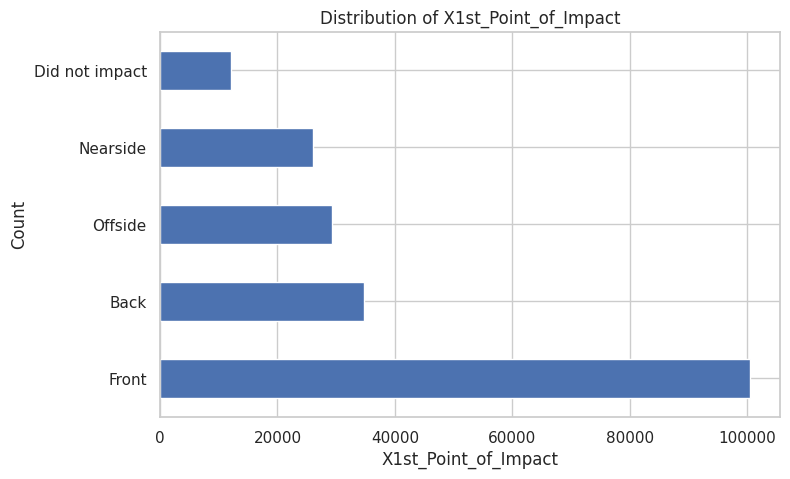

In [45]:
X1st_Point_of_Impact_distribution = accident_df['X1st_Point_of_Impact'].value_counts()

plt.figure(figsize=(8, 5))

X1st_Point_of_Impact_distribution.plot(kind='barh')
plt.title('Distribution of X1st_Point_of_Impact')
plt.xlabel('X1st_Point_of_Impact')
plt.ylabel('Count')
plt.show()

### Transforming categorical features

In [ ]:
len(categorical_cols)

20

In [ ]:
# Using one-hot encoding
processed_accident_df = pd.get_dummies(accident_df.drop(columns=['Accident_Severity'],inplace=False))
processed_accident_df = pd.concat([processed_accident_df, accident_df['Accident_Severity']], axis=1)
processed_accident_df

,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Vehicle_Reference,Day_of_Week_Friday,...,Vehicle_Type_Ridden horse,Vehicle_Type_Taxi/Private hire car,Vehicle_Type_Tram,Vehicle_Type_Van / Goods 3.5 tonnes mgw or under,X1st_Point_of_Impact_Back,X1st_Point_of_Impact_Did not impact,X1st_Point_of_Impact_Front,X1st_Point_of_Impact_Nearside,X1st_Point_of_Impact_Offside,Accident_Severity
0,1.0,2.0,0.0,0.0,30.0,5.0,1796.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,1,Slight
1,1.0,2.0,0.0,0.0,30.0,10.0,999.0,0.0,2.0,0,...,0,0,0,0,0,0,1,0,0,Slight
2,2.0,2.0,0.0,0.0,40.0,6.0,1840.0,0.0,1.0,0,...,0,0,0,0,0,0,1,0,0,Fatal
3,1.0,1.0,0.0,0.0,40.0,7.0,125.0,0.0,1.0,0,...,0,0,0,0,0,1,0,0,0,Serious
4,1.0,2.0,0.0,5.0,40.0,10.0,2435.0,5.0,2.0,0,...,0,0,0,0,0,1,0,0,0,Serious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203189,2.0,1.0,0.0,0.0,70.0,15.0,1997.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,0,Serious
203190,1.0,1.0,0.0,0.0,30.0,7.0,1598.0,0.0,1.0,0,...,0,0,0,0,0,0,1,0,0,Slight
203191,2.0,2.0,0.0,0.0,30.0,4.0,124.0,2.0,2.0,0,...,0,0,0,0,0,0,0,0,1,Slight
203192,6.0,2.0,0.0,0.0,60.0,7.0,1398.0,0.0,2.0,0,...,0,0,0,0,0,0,1,0,0,Slight


# Training a model to predict severity

First of all, let's train a good model to predict the severity of accident. We'll try Logistic Regression, Random Forest Classifier and Gradient Boosting with Decision Trees. Let's also perform some hyperparameter tuning here with cross validation.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score

## Data Splitting

In [47]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into features and target variable
X = processed_accident_df.drop('Accident_Severity', axis=1)
y = processed_accident_df['Accident_Severity']

In [ ]:
# Splitting the dataset into training (70%), validation (15%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

# Checking the shape of the training and testing sets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((141873, 128), (30401, 128), (30402, 128), (141873,), (30401,), (30402,))

## Logistic Regression

Adding a scaler before traing a Logistic Regression model as it is sensitive to features of different scales.

Train and validation sets are concatenated as Grid Search performes a 5-fold cross validation itself.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
logreg = LogisticRegression(max_iter=int(1e3), random_state=random_state)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_val_df = pd.concat([X_train, X_val])
X_train_val_df[X_train_val_df.columns] = scaler.transform(X_train_val_df[X_train_val_df.columns])

parameters = {
    'class_weight':['balanced', None],
    'C':[0.1, 1, 10],
    'tol': [1e-3, 1e-4, 1e-5]
    }

clf = GridSearchCV(logreg, parameters, verbose=3)
clf.fit(X_train_val_df, pd.concat([y_train, y_val]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=0.1, class_weight=balanced, tol=0.001;, score=0.533 total time= 1.6min
[CV 2/5] END C=0.1, class_weight=balanced, tol=0.001;, score=0.529 total time= 1.4min
[CV 3/5] END C=0.1, class_weight=balanced, tol=0.001;, score=0.529 total time= 1.1min
[CV 4/5] END C=0.1, class_weight=balanced, tol=0.001;, score=0.527 total time= 1.1min
[CV 5/5] END C=0.1, class_weight=balanced, tol=0.001;, score=0.534 total time= 1.1min
[CV 1/5] END C=0.1, class_weight=balanced, tol=0.0001;, score=0.533 total time= 1.1min
[CV 2/5] END C=0.1, class_weight=balanced, tol=0.0001;, score=0.529 total time= 1.1min
[CV 3/5] END C=0.1, class_weight=balanced, tol=0.0001;, score=0.529 total time= 1.1min
[CV 4/5] END C=0.1, class_weight=balanced, tol=0.0001;, score=0.527 total time= 1.1min
[CV 5/5] END C=0.1, class_weight=balanced, tol=0.0001;, score=0.534 total time= 1.1min
[CV 1/5] END C=0.1, class_weight=balanced, tol=1e-05;, score=0.533 total t

/home/nadezhda/.virtualenvs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight=None, tol=0.001;, score=0.705 total time= 2.6min
[CV 1/5] END C=10, class_weight=None, tol=0.0001;, score=0.703 total time= 2.6min
[CV 2/5] END C=10, class_weight=None, tol=0.0001;, score=0.704 total time= 2.4min
[CV 3/5] END C=10, class_weight=None, tol=0.0001;, score=0.703 total time= 2.3min
[CV 4/5] END C=10, class_weight=None, tol=0.0001;, score=0.704 total time= 2.2min


/home/nadezhda/.virtualenvs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight=None, tol=0.0001;, score=0.705 total time= 2.6min
[CV 1/5] END C=10, class_weight=None, tol=1e-05;, score=0.703 total time= 2.5min
[CV 2/5] END C=10, class_weight=None, tol=1e-05;, score=0.704 total time= 2.4min
[CV 3/5] END C=10, class_weight=None, tol=1e-05;, score=0.703 total time= 2.4min
[CV 4/5] END C=10, class_weight=None, tol=1e-05;, score=0.704 total time= 2.1min


/home/nadezhda/.virtualenvs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=10, class_weight=None, tol=1e-05;, score=0.705 total time= 2.5min


GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=26),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=3)

In [ ]:
clf.best_params_

{'C': 10, 'class_weight': None, 'tol': 0.001}

In [ ]:
# training Logistic Regression with best parameters
logreg = LogisticRegression(max_iter=int(1e4), random_state=random_state, C=10, tol=1e-3)

X_train_df = X_train.copy()
X_train_df[X_train_df.columns] = scaler.transform(X_train_df[X_train_df.columns])

logreg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, random_state=26, tol=0.001)

In [ ]:
X_test_df = X_test.copy()
X_test_df[X_test_df.columns] = scaler.transform(X_test_df[X_test_df.columns])

logreg_pred = logreg.predict(X_test)

print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

       Fatal       0.15      0.00      0.01       880
     Serious       0.55      0.18      0.27      8764
      Slight       0.72      0.95      0.82     20758

    accuracy                           0.70     30402
   macro avg       0.47      0.38      0.36     30402
weighted avg       0.65      0.70      0.64     30402



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=random_state)

parameters = {
    'class_weight':['balanced', None],
    'n_estimators':[1, 10, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf':[1, 10, 100]
    }

clf = GridSearchCV(rf, parameters, verbose=3)
clf.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=1;, score=0.613 total time=   0.8s
[CV 2/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=1;, score=0.612 total time=   0.8s
[CV 3/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=1;, score=0.615 total time=   0.8s
[CV 4/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=1;, score=0.612 total time=   0.7s
[CV 5/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=1;, score=0.614 total time=   0.7s
[CV 1/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=10;, score=0.697 total time=   3.5s
[CV 2/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=10;, score=0.692 total time=   4.9s
[CV 3/5] END class_weight=balanced, criterion=gini, min_samples_leaf=1, n_estimators=10;, score=

GridSearchCV(estimator=RandomForestClassifier(random_state=26),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 10, 100],
                         'n_estimators': [1, 10, 100, 500]},
             verbose=3)

In [ ]:
clf.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [ ]:
# training Random Forest with best parameters
rf = RandomForestClassifier(random_state=random_state, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=26)

In [ ]:
rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       Fatal       0.57      0.01      0.03       880
     Serious       0.54      0.23      0.32      8764
      Slight       0.73      0.93      0.82     20758

    accuracy                           0.70     30402
   macro avg       0.61      0.39      0.39     30402
weighted avg       0.67      0.70      0.65     30402



## CatBoost

In [48]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.2 MB/s eta 0:00:00


### Splitting data for catboost

As catboost transforms categorical features itself, let's use the cleaned dataset but without one-hot encoding.

In [49]:
# Splitting the data into features and target variable
X = accident_df.drop('Accident_Severity', axis=1)
y = accident_df['Accident_Severity']

# Splitting the dataset into training (70%), validation (15%) and testing (15%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

# Checking the shape of the training and testing sets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((141873, 27), (30401, 27), (30402, 27), (141873,), (30401,), (30402,))

### Training

In [50]:
from catboost import CatBoostClassifier

cat_features = list(X_train.select_dtypes(include=['object']).columns)
cb = CatBoostClassifier(task_type="GPU", random_seed=random_state)
cb.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_val, y_val))

Learning rate set to 0.17345
0:	learn: 0.9826864	test: 0.9822483	best: 0.9822483 (0)	total: 25.4ms	remaining: 25.4s
1:	learn: 0.9058554	test: 0.9051114	best: 0.9051114 (1)	total: 41.8ms	remaining: 20.8s
2:	learn: 0.8513503	test: 0.8504906	best: 0.8504906 (2)	total: 58.3ms	remaining: 19.4s
3:	learn: 0.8108643	test: 0.8099715	best: 0.8099715 (3)	total: 74.3ms	remaining: 18.5s
4:	learn: 0.7803845	test: 0.7795587	best: 0.7795587 (4)	total: 90.7ms	remaining: 18s
5:	learn: 0.7569589	test: 0.7562214	best: 0.7562214 (5)	total: 115ms	remaining: 19s
6:	learn: 0.7389025	test: 0.7381985	best: 0.7381985 (6)	total: 130ms	remaining: 18.5s
7:	learn: 0.7247836	test: 0.7240295	best: 0.7240295 (7)	total: 146ms	remaining: 18.2s
8:	learn: 0.7118037	test: 0.7111779	best: 0.7111779 (8)	total: 162ms	remaining: 17.9s
9:	learn: 0.7016961	test: 0.7013106	best: 0.7013106 (9)	total: 178ms	remaining: 17.7s
10:	learn: 0.6938346	test: 0.6935618	best: 0.6935618 (10)	total: 194ms	remaining: 17.5s
11:	learn: 0.6876284	t

In [ ]:
cb_pred = cb.predict(X_test)

print(classification_report(y_test, cb_pred))

              precision    recall  f1-score   support

       Fatal       0.48      0.03      0.06       880
     Serious       0.55      0.25      0.34      8764
      Slight       0.73      0.93      0.82     20758

    accuracy                           0.71     30402
   macro avg       0.59      0.40      0.41     30402
weighted avg       0.67      0.71      0.66     30402



# Feature importance analysis

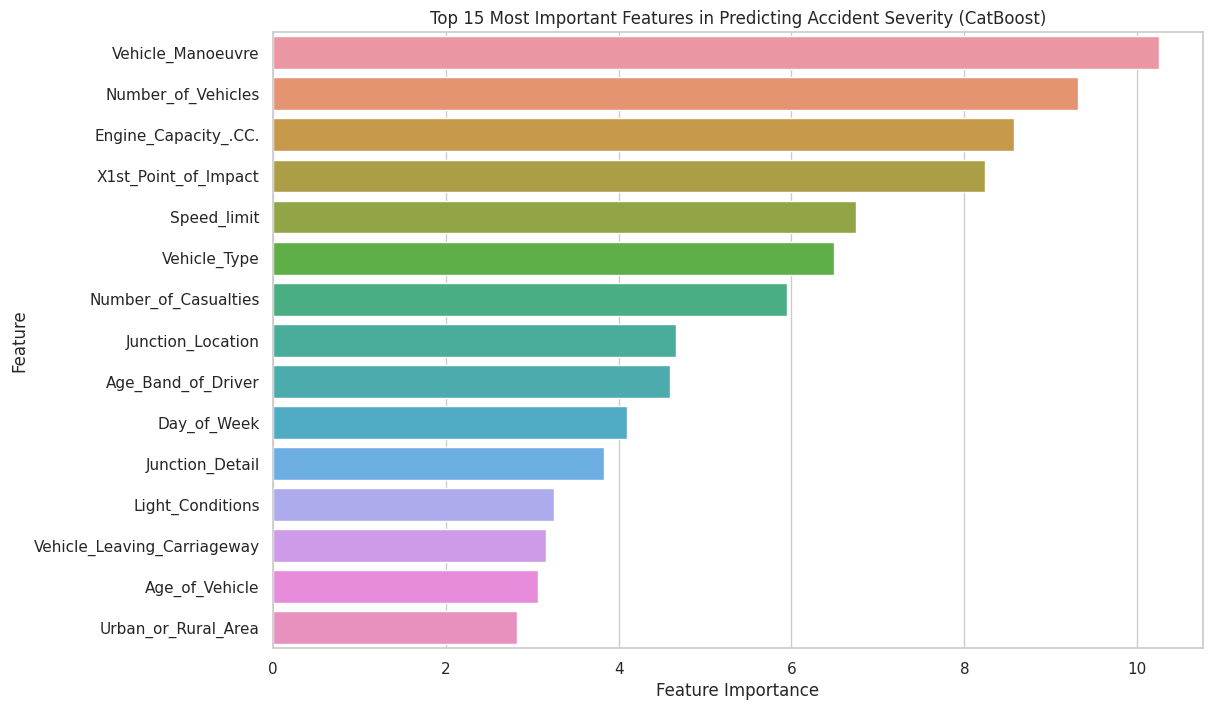

,Feature,Importance
23,Vehicle_Manoeuvre,10.247168
5,Number_of_Vehicles,9.313061
16,Engine_Capacity_.CC.,8.568953
26,X1st_Point_of_Impact,8.242414
10,Speed_limit,6.744765
25,Vehicle_Type,6.494269
4,Number_of_Casualties,5.949586
17,Junction_Location,4.664351
13,Age_Band_of_Driver,4.595195
0,Day_of_Week,4.097619


In [91]:
# Feature importance analysis using CatBoost model
feature_importances = cb.feature_importances_

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sorting the features by their importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Most Important Features in Predicting Accident Severity (CatBoost)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Displaying the top 15 important features
feature_importance_df.head(15)

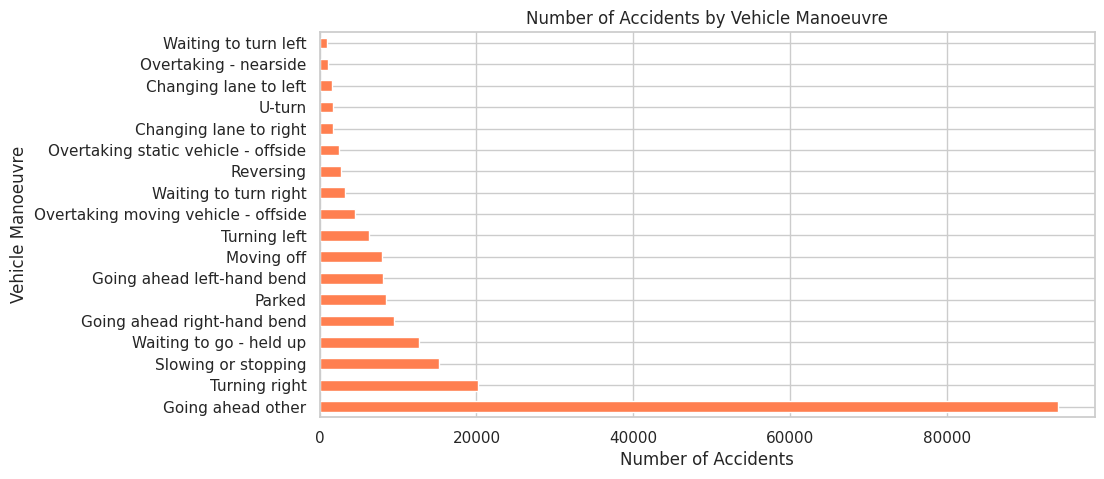

In [ ]:
# Distribution of vehicle manoeuvre
Vehicle_Manoeuvre_distribution = accident_df['Vehicle_Manoeuvre'].value_counts()

plt.figure(figsize=(10, 5))

Vehicle_Manoeuvre_distribution.plot(kind='barh', color='coral')
plt.title('Number of Accidents by Vehicle Manoeuvre')
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Manoeuvre')
plt.show()

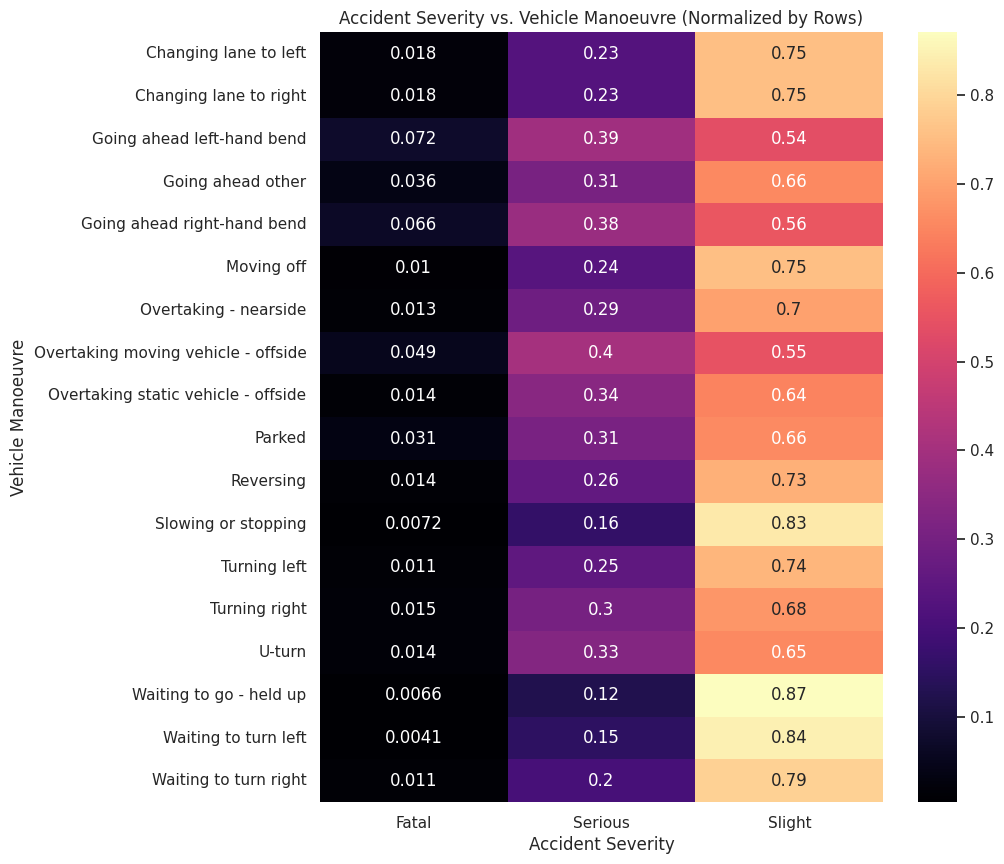

In [ ]:
# Analysis of accidents based on vehicle manoeuvre
manoeuvre_severity = pd.crosstab(accident_df['Vehicle_Manoeuvre'], accident_df['Accident_Severity'])
manoeuvre_severity_normalized_by_rows = manoeuvre_severity.div(manoeuvre_severity.sum(axis=1), axis=0)
manoeuvre_severity_normalized_by_columns = manoeuvre_severity.div(manoeuvre_severity.sum(axis=0), axis=1)

# Plotting the normalized heatmaps
plt.figure(figsize=(20, 10))

# Normalized by rows
plt.subplot(1, 2, 1)
sns.heatmap(manoeuvre_severity_normalized_by_rows, annot=True, cmap='magma')
plt.title('Accident Severity vs. Vehicle Manoeuvre (Normalized by Rows)')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Manoeuvre')

plt.show()

In [ ]:
# Filter the dataset for different severities of accidents
slight_data = accident_df[accident_df['Accident_Severity'] == 'Slight']
serious_data = accident_df[accident_df['Accident_Severity'] == 'Serious']
fatal_data = accident_df[accident_df['Accident_Severity'] == 'Fatal']

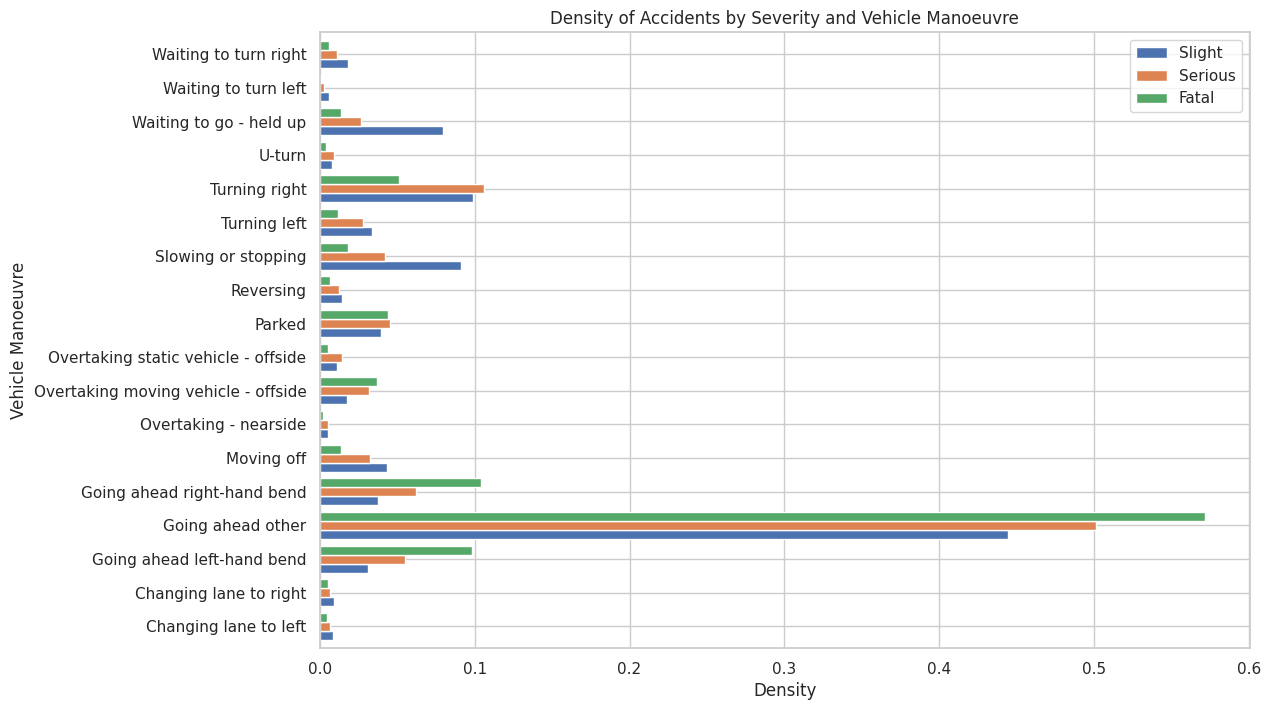

In [ ]:
# Count the occurrences of each maneouvre (normalized to get densities)
slight_maneouvre_counts = slight_data['Vehicle_Manoeuvre'].value_counts(normalize=True)
serious_maneouvre_counts = serious_data['Vehicle_Manoeuvre'].value_counts(normalize=True)
fatal_maneouvre_counts = fatal_data['Vehicle_Manoeuvre'].value_counts(normalize=True)

# Combine the counts into a single DataFrame for easier plotting
combined_severity_counts = pd.DataFrame({
    'Slight': slight_maneouvre_counts,
    'Serious': serious_maneouvre_counts,
    'Fatal': fatal_maneouvre_counts
})

# Plotting the bar chart for accident severity
combined_severity_counts.plot(kind='barh', figsize=(12, 8), width=0.8)
plt.ylabel('Vehicle Manoeuvre')
plt.xlabel('Density')
plt.title('Density of Accidents by Severity and Vehicle Manoeuvre')
plt.show()


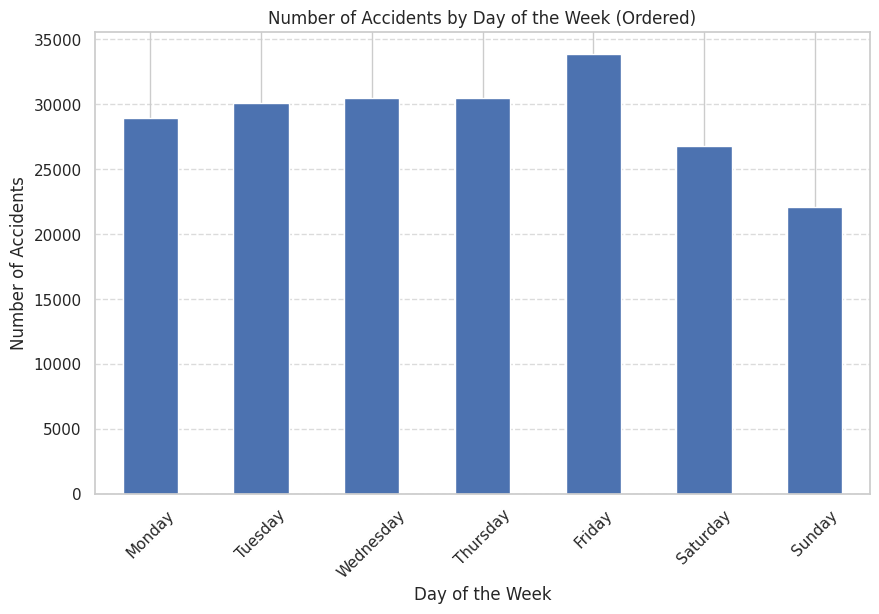

In [ ]:
# Ordering the days of the week from Monday to Sunday
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accidents_per_ordered_day = accident_df['Day_of_Week'].value_counts().reindex(ordered_days)

# Plotting the histogram with the ordered days
plt.figure(figsize=(10,6))
accidents_per_ordered_day.plot(kind='bar')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

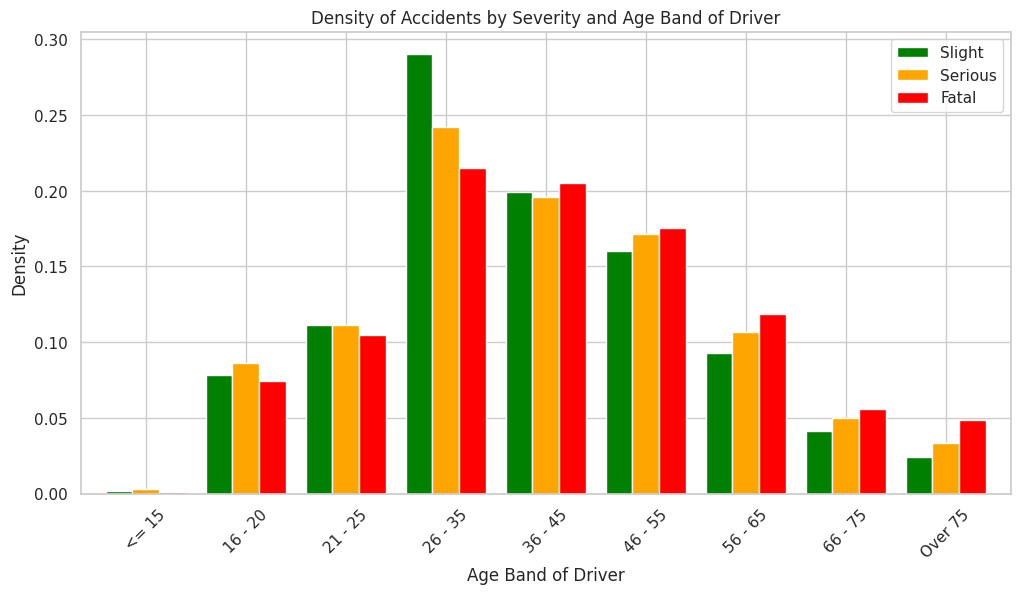

In [ ]:
# Count the occurrences in each age band (normalized to get densities)
slight_age_counts = slight_data['Age_Band_of_Driver'].value_counts(normalize=True)
serious_age_counts = serious_data['Age_Band_of_Driver'].value_counts(normalize=True)
fatal_age_counts = fatal_data['Age_Band_of_Driver'].value_counts(normalize=True)

# Combine the counts into a single DataFrame for easier plotting
combined_severity_counts = pd.DataFrame({
    'Slight': slight_age_counts,
    'Serious': serious_age_counts,
    'Fatal': fatal_age_counts
})

# Re-sorting the DataFrame with the corrected index
age_band_order = ['<= 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']
combined_severity_counts_sorted = combined_severity_counts.reindex(age_band_order)

# Plotting the bar chart for accident severity
combined_severity_counts_sorted.plot(kind='bar', color=['green', 'orange', 'red'], figsize=(12, 6), width=0.8)
plt.xlabel('Age Band of Driver')
plt.ylabel('Density')
plt.title('Density of Accidents by Severity and Age Band of Driver')
plt.xticks(rotation=45)
plt.show()

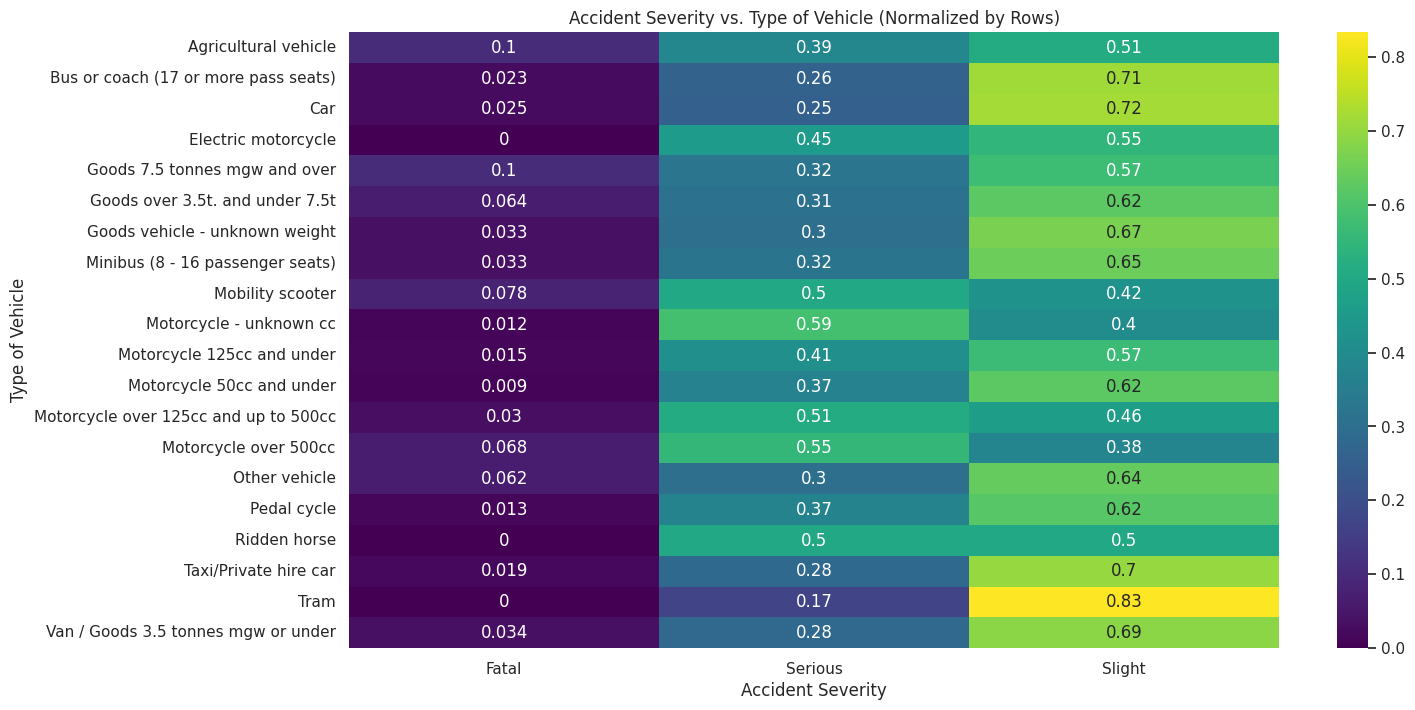

In [ ]:
# Analysis of accidents based on vehicle type
vehicle_severity = pd.crosstab(accident_df['Vehicle_Type'], accident_df['Accident_Severity'])
vehicle_severity_normalized_by_rows = vehicle_severity.div(vehicle_severity.sum(axis=1), axis=0)

# Plotting more detailed insights
plt.figure(figsize=(15, 8))

# Plotting accident severity vs. vehicle type
sns.heatmap(vehicle_severity_normalized_by_rows, annot=True, cmap='viridis')
plt.title('Accident Severity vs. Type of Vehicle (Normalized by Rows)')
plt.xlabel('Accident Severity')
plt.ylabel('Type of Vehicle')
plt.show()

According to crosstab above, getting into an accident on a motorcycle will more likely result in a serious accident. Need to raise public awareness and encourage motorcyclists to be more careful on the roads.

Text(153.75, 0.5, 'Light Conditions')

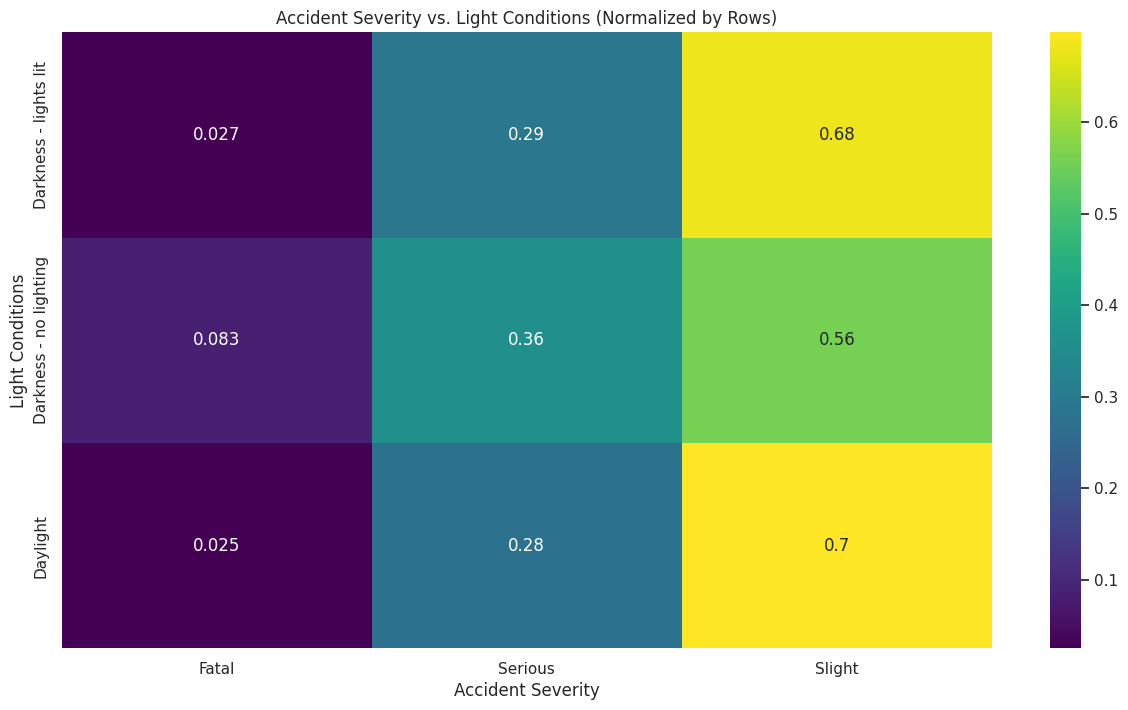

In [ ]:
# Analysis of accidents based on lights conditions
Light_Conditions_severity = pd.crosstab(accident_df['Light_Conditions'], accident_df['Accident_Severity'])
Light_Conditions_severity_normalized_by_rows = Light_Conditions_severity.div(Light_Conditions_severity.sum(axis=1), axis=0)

# Plotting more detailed insights
plt.figure(figsize=(15, 8))

# Plotting accident severity vs. lights conditions
sns.heatmap(Light_Conditions_severity_normalized_by_rows, annot=True, cmap='viridis')
plt.title('Accident Severity vs. Light Conditions (Normalized by Rows)')
plt.xlabel('Accident Severity')
plt.ylabel('Light Conditions')
plt.show()

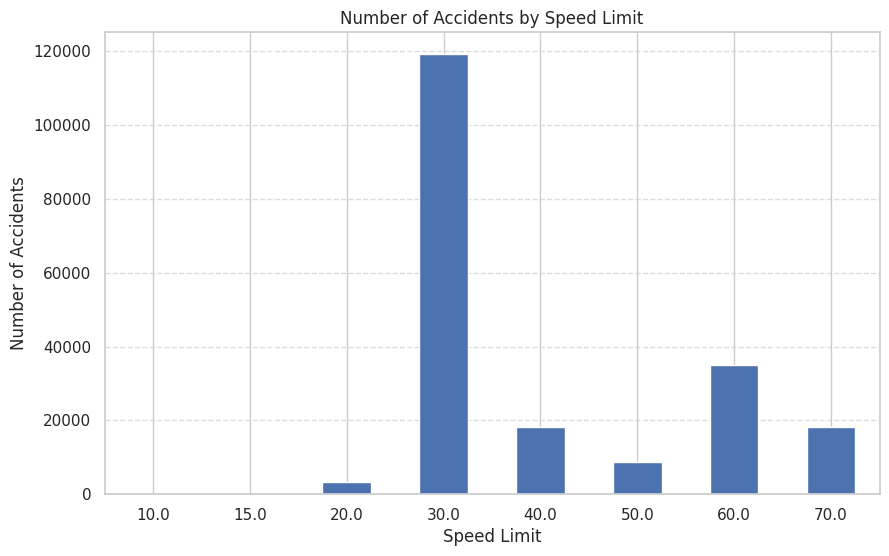

In [ ]:
# Count the number of accidents for each speed limit category
accidents_per_speed_limit = accident_df['Speed_limit'].value_counts()

# Sorting the speed limit categories in ascending order
accidents_per_speed_limit_sorted = accidents_per_speed_limit.sort_index()

# Replotting the histogram with sorted speed limits
plt.figure(figsize=(10,6))
accidents_per_speed_limit_sorted.plot(kind='bar')
plt.title('Number of Accidents by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar plot above demonstrates that a lower speed limit itself does not necessarily means a safer road. But let's take a look at how speed limits contribute to accident severity on dangerous zones.

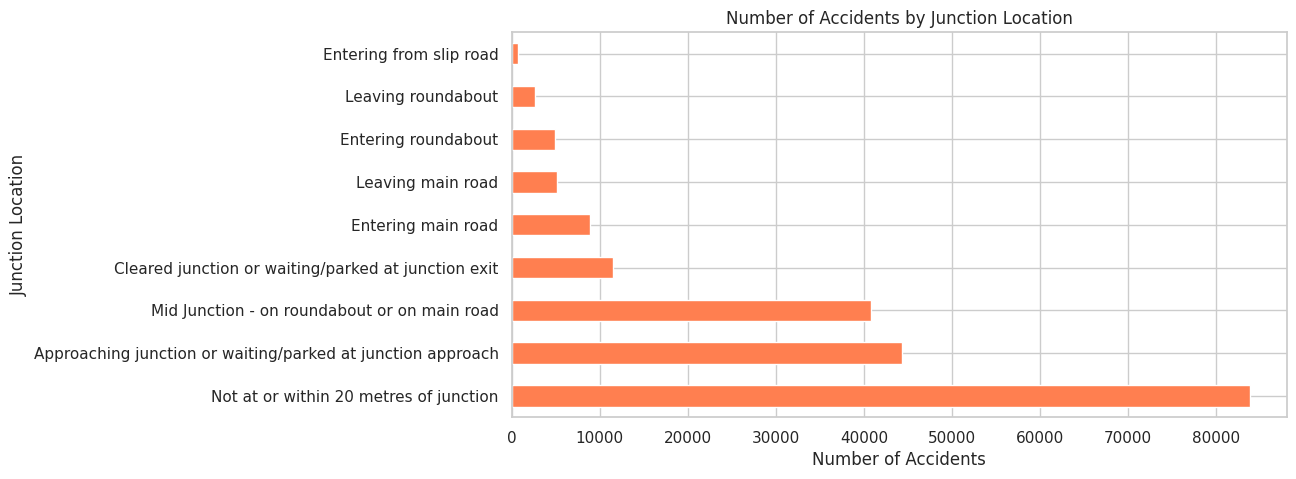

In [ ]:
# Distribution of junction location
Vehicle_Manoeuvre_distribution = accident_df['Junction_Location'].value_counts()

plt.figure(figsize=(10, 5))

Vehicle_Manoeuvre_distribution.plot(kind='barh', color='coral')
plt.title('Number of Accidents by Junction Location')
plt.xlabel('Number of Accidents')
plt.ylabel('Junction Location')
plt.show()

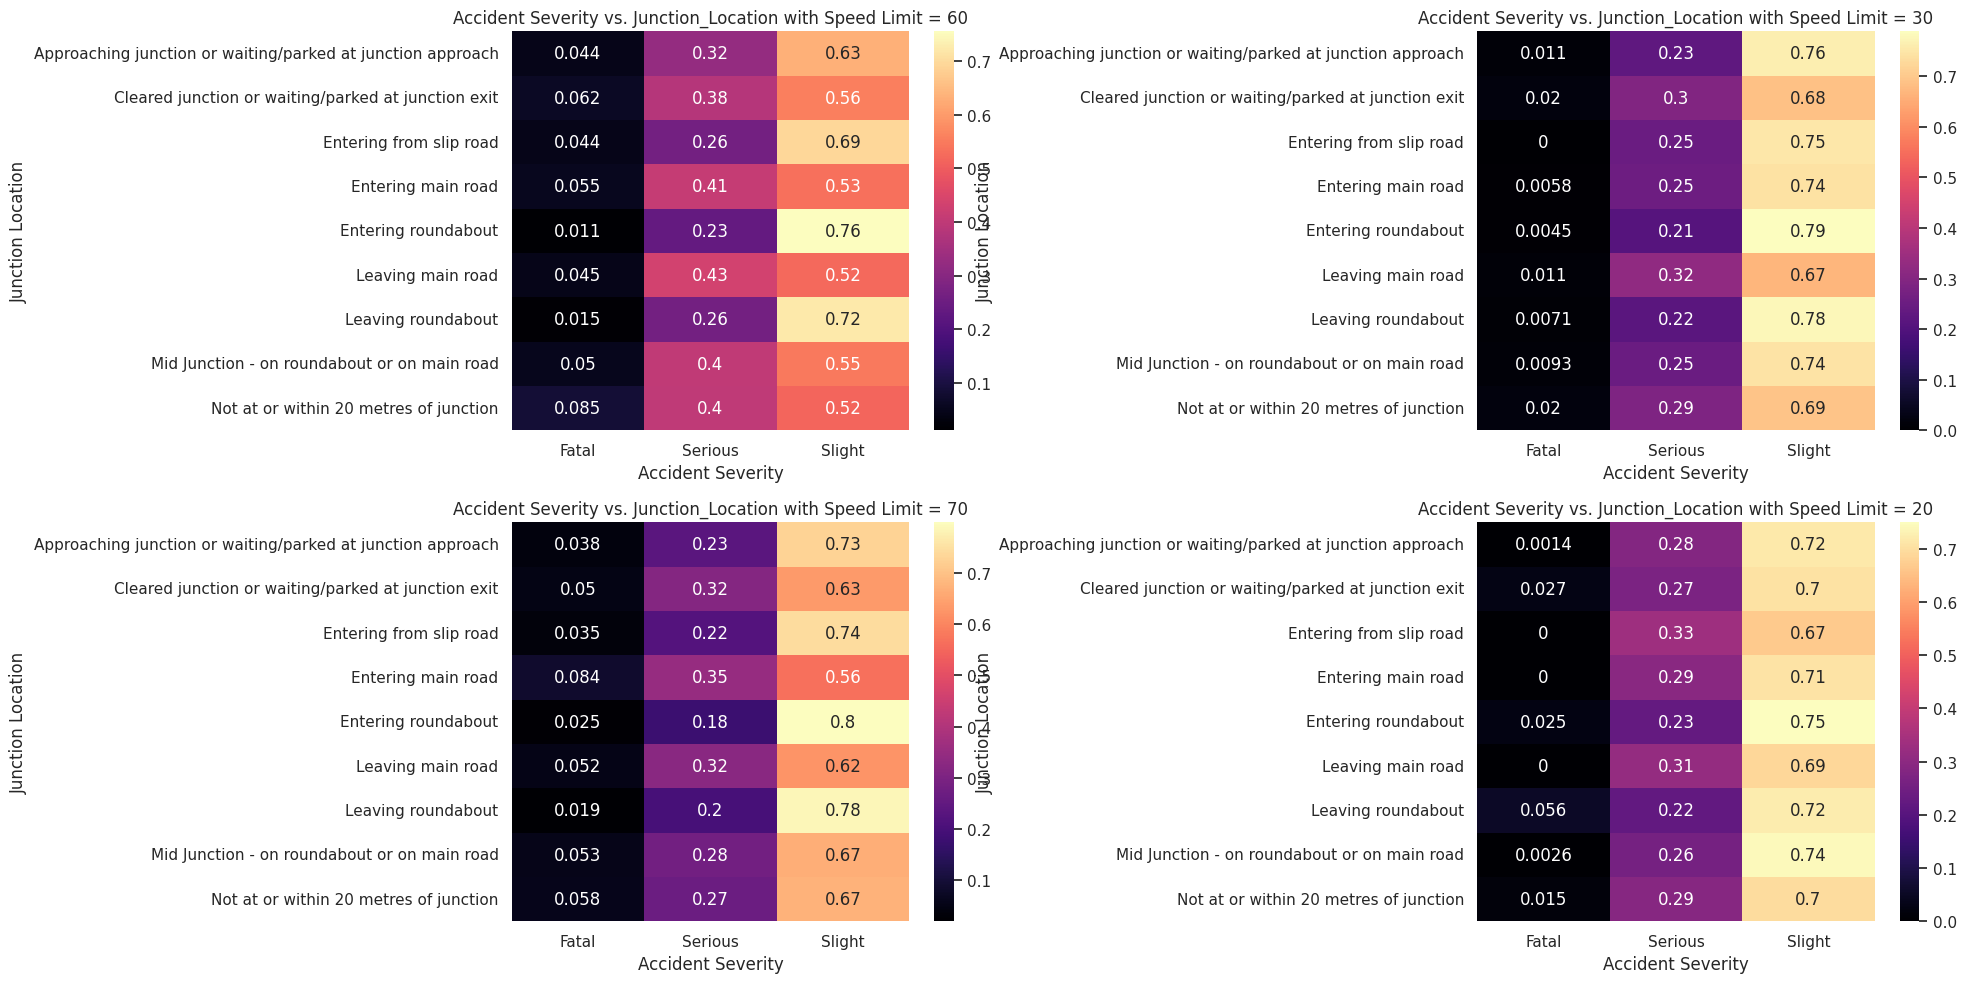

In [64]:
# Analysis of accidents based on junction location and speed limit
speed_60_df = accident_df.loc[accident_df['Speed_limit'] == 60]
speed_30_df = accident_df.loc[accident_df['Speed_limit'] == 30]
speed_70_df = accident_df.loc[accident_df['Speed_limit'] == 70]
speed_20_df = accident_df.loc[accident_df['Speed_limit'] == 20]
speed_60_Junction_Location_severity = pd.crosstab(speed_60_df['Junction_Location'], accident_df['Accident_Severity'])
speed_30_Junction_Location_severity = pd.crosstab(speed_30_df['Junction_Location'], accident_df['Accident_Severity'])
speed_70_Junction_Location_severity = pd.crosstab(speed_70_df['Junction_Location'], accident_df['Accident_Severity'])
speed_20_Junction_Location_severity = pd.crosstab(speed_20_df['Junction_Location'], accident_df['Accident_Severity'])

speed_60_Junction_Location_severity_normalized_by_rows = speed_60_Junction_Location_severity.div(speed_60_Junction_Location_severity.sum(axis=1), axis=0)
speed_30_Junction_Location_severity_normalized_by_rows = speed_30_Junction_Location_severity.div(speed_30_Junction_Location_severity.sum(axis=1), axis=0)
speed_70_Junction_Location_severity_normalized_by_rows = speed_70_Junction_Location_severity.div(speed_70_Junction_Location_severity.sum(axis=1), axis=0)
speed_20_Junction_Location_severity_normalized_by_rows = speed_20_Junction_Location_severity.div(speed_20_Junction_Location_severity.sum(axis=1), axis=0)

# Plotting the normalized heatmaps
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.heatmap(speed_60_Junction_Location_severity_normalized_by_rows, annot=True, cmap='magma')
plt.title('Accident Severity vs. Junction_Location with Speed Limit = 60')
plt.xlabel('Accident Severity')
plt.ylabel('Junction Location')

plt.subplot(2, 2, 2)
sns.heatmap(speed_30_Junction_Location_severity_normalized_by_rows, annot=True, cmap='magma')
plt.title('Accident Severity vs. Junction_Location with Speed Limit = 30')
plt.xlabel('Accident Severity')
plt.ylabel('Junction Location')

plt.subplot(2, 2, 3)
sns.heatmap(speed_70_Junction_Location_severity_normalized_by_rows, annot=True, cmap='magma')
plt.title('Accident Severity vs. Junction_Location with Speed Limit = 70')
plt.xlabel('Accident Severity')
plt.ylabel('Junction Location')

plt.subplot(2, 2, 4)
sns.heatmap(speed_20_Junction_Location_severity_normalized_by_rows, annot=True, cmap='magma')
plt.title('Accident Severity vs. Junction_Location with Speed Limit = 20')
plt.xlabel('Accident Severity')
plt.ylabel('Junction Location')

plt.tight_layout()
plt.show()

## Checking changes with trained model

One of the proposals is to avoid unlit areas. Let's take samples where 'Light_Conditions' feature has value 'Darkness - no lightning' and raplace it with 'Darkness - lit' and see how the predictions change.

First, we'll subsample a new dataset from the initial tables, so that the data is not seen by the model while training. And apply the same changes as before.

In [51]:
# Creating weights for sampling so that the final dataset includes all severity types
weights = np.where(accident_data['Accident_Severity'] == 'Slight', 0.25, 0.75)

# Sampling 10% of the data with new weights
accident_data_small = accident_data.sample(frac=0.1, weights=weights)

# Now we can merge the tables with accident info and driver info
# joining tables on Accident_Index
test_accident_df = pd.merge(accident_data_small, vehicle_data, on="Accident_Index", how="inner")

# Applying all the preprocessing steps
test_accident_df.drop(columns=['Accident_Index','LSOA_of_Accident_Location', 'model'],inplace=True)
test_accident_df.replace(to_replace=['None', 'Data missing or out of range',
                                'Unknown', 'Unallocated', 'Not known',
                                'Other/Not known (2005-10)'], value=np.nan, inplace=True)
test_accident_df.drop(columns=['Carriageway_Hazards','Special_Conditions_at_Site', 'Hit_Object_in_Carriageway',
                          'Hit_Object_off_Carriageway', 'Skidding_and_Overturning', 'Journey_Purpose_of_Driver'],inplace=True)
test_accident_df.drop(columns=['2nd_Road_Class','1st_Road_Number', '2nd_Road_Number',
                          'Driver_IMD_Decile', '1st_Road_Class', 'Police_Force'],inplace=True)
test_accident_df.drop(columns=['Did_Police_Officer_Attend_Scene_of_Accident',
                          'Latitude', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
                          'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
                          'Year_x', 'InScotland', 'Year_y', 'Date', 'Time', 'make'],inplace=True)
# Imputing missing values in numerical columns with median values
numerical_cols = test_accident_df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
test_accident_df[numerical_cols] = imputer.fit_transform(test_accident_df[numerical_cols])
# Imputing missing values in categorical columns with the most frequent value in each column
categorical_cols = test_accident_df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')

test_accident_df[categorical_cols] = cat_imputer.fit_transform(test_accident_df[categorical_cols])
# categorical features
test_accident_df.drop(test_accident_df[test_accident_df['Junction_Control'] == 'Authorised person'].index, inplace=True)
test_accident_df['Junction_Detail'].replace(to_replace=['Mini-roundabout'],
                                               value='Roundabout', inplace=True)
test_accident_df['Light_Conditions'].replace(to_replace=['Darkness - lights unlit', 'Darkness - lighting unknown'],
                                               value='Darkness - no lighting', inplace=True)
test_accident_df['Road_Surface_Conditions'].replace(to_replace=['Flood over 3cm. deep'],
                                               value='Wet or damp', inplace=True)
test_accident_df['Road_Surface_Conditions'].replace(to_replace=['Frost or ice', 'Snow'],
                                               value='Snow, frost or ice', inplace=True)
test_accident_df['Age_Band_of_Driver'].replace(to_replace=['0 - 5', '6 - 10', '11 - 15'],
                                               value='<= 15', inplace=True)
test_accident_df['Propulsion_Code'].replace(to_replace=['Electric', 'Hybrid electric', 'Electric diesel'],
                                               value='Electric', inplace=True)
test_accident_df['Propulsion_Code'].replace(to_replace=['Gas/Bi-fuel', 'Petrol/Gas (LPG)', 'Steam', 'Gas',
                                                   'Gas Diesel', 'New fuel technology'],
                                               value='Other', inplace=True)
test_accident_df.drop(test_accident_df[test_accident_df['Propulsion_Code'] == 'Other'].index, inplace=True)
test_accident_df['Towing_and_Articulation'].replace(to_replace=['Single trailer', 'Other tow',
                                                           'Double or multiple trailer', 'Caravan'],
                                               value='Trailer, caravan or other tow', inplace=True)
test_accident_df['Vehicle_Leaving_Carriageway'].replace(to_replace=['Offside - crossed central reservation',
                                                               'Offside on to centrl res + rebounded'],
                                               value='Offside and rebounded', inplace=True)
test_accident_df.drop(columns=['Was_Vehicle_Left_Hand_Drive'],inplace=True)

In [52]:
no_light_df = test_accident_df.loc[test_accident_df['Light_Conditions'] == 'Darkness - no lighting']
print(no_light_df.shape)
no_light_df.head()

(14285, 28)


,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,...,Junction_Location,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact
6,Slight,Sunday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - no lighting,1.0,2.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2.0,Car,Front
14,Slight,Monday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - no lighting,2.0,3.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Heavy oil,Male,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1.0,Car,Back
15,Slight,Monday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - no lighting,2.0,3.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2.0,Car,Front
16,Slight,Monday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - no lighting,2.0,3.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,3.0,Van / Goods 3.5 tonnes mgw or under,Front
20,Slight,Wednesday,Not at junction or within 20 metres,Not at junction or within 20 metres,Darkness - no lighting,2.0,3.0,0.0,0.0,Dry,...,Not at or within 20 metres of junction,Petrol,Female,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,2.0,Car,Back


In [54]:
light_df = no_light_df.replace(to_replace=['Darkness - no lighting'], value='Darkness - lights lit')
light_df.head()

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,...,Junction_Location,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact
6,Slight,Sunday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - lights lit,1.0,2.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2.0,Car,Front
14,Slight,Monday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - lights lit,2.0,3.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Heavy oil,Male,No tow/articulation,Offside on to central reservation,0.0,Going ahead other,1.0,Car,Back
15,Slight,Monday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - lights lit,2.0,3.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2.0,Car,Front
16,Slight,Monday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - lights lit,2.0,3.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,3.0,Van / Goods 3.5 tonnes mgw or under,Front
20,Slight,Wednesday,Not at junction or within 20 metres,Not at junction or within 20 metres,Darkness - lights lit,2.0,3.0,0.0,0.0,Dry,...,Not at or within 20 metres of junction,Petrol,Female,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,2.0,Car,Back


In [59]:
X_no_light = no_light_df.drop('Accident_Severity', axis=1)
y_no_light = no_light_df['Accident_Severity']

X_light = light_df.drop('Accident_Severity', axis=1)
y_light = light_df['Accident_Severity']

no_light_results = cb.predict(X_no_light)
light_results = cb.predict(X_light)

In [83]:
# Counting the occurrences of each severity type
unique_no_lights, counts_no_lights = np.unique(no_light_results, return_counts=True)
severity_percentage_no_light = counts_no_lights / no_light_results.shape[0] * 100

unique_lights, counts_lights = np.unique(light_results, return_counts=True)
severity_percentage_light = counts_lights / no_light_results.shape[0] * 100

print('Severity Type | %, no light | %, with light')
print('-------------------------------------------------------------')
for i in range(len(unique_lights)):
    print(f'{unique_lights[i]}           {severity_percentage_no_light[i]:.3f}         {severity_percentage_light[i]:.3f}')

Severity Type | %, no light | %, with light
-------------------------------------------------------------
Fatal           1.022         0.693
Serious           27.371         24.711
Slight           71.607         74.596


As we see, the number of fatal and serious accidents has decreased.

Let's see how the situation changes if we decrease speed limit before junctions.

In [70]:
dangerous_junction_df = test_accident_df.loc[test_accident_df['Junction_Location'].isin(['Not at or within 20 metres of junction',
                                          'Approaching junction or waiting/parked at junction approach', 'Cleared junction or waiting/parked at junction exit',
                                          'Entering main road', 'Mid Junction - on roundabout or on main road',
                                          'Leaving main road'])]
print(dangerous_junction_df.shape)
dangerous_junction_df.head()

(194296, 28)


,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,...,Junction_Location,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact
0,Fatal,Saturday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - lights lit,3.0,1.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Petrol,Female,No tow/articulation,Nearside,0.0,Going ahead other,1.0,Car,Offside
1,Slight,Sunday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,1.0,1.0,0.0,0.0,Dry,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Nearside and rebounded,0.0,Going ahead right-hand bend,1.0,Car,Nearside
2,Slight,Sunday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,1.0,2.0,0.0,0.0,Dry,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Nearside,9.0,Going ahead other,2.0,Motorcycle 125cc and under,Back
3,Slight,Thursday,Give way or uncontrolled,T or staggered junction,Daylight,1.0,1.0,0.0,0.0,Dry,...,Approaching junction or waiting/parked at junc...,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1.0,Van / Goods 3.5 tonnes mgw or under,Front
5,Slight,Saturday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,1.0,1.0,0.0,1.0,Dry,...,Not at or within 20 metres of junction,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1.0,Van / Goods 3.5 tonnes mgw or under,Front


In [86]:
junction_low_speed_df = dangerous_junction_df.replace(to_replace=[60., 70.], value=30.)
junction_low_speed_df.head()

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,...,Junction_Location,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,X1st_Point_of_Impact
0,Fatal,Saturday,Give way or uncontrolled,Not at junction or within 20 metres,Darkness - lights lit,3.0,1.0,0.0,0.0,Wet or damp,...,Not at or within 20 metres of junction,Petrol,Female,No tow/articulation,Nearside,0.0,Going ahead other,1.0,Car,Offside
1,Slight,Sunday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,1.0,1.0,0.0,0.0,Dry,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Nearside and rebounded,0.0,Going ahead right-hand bend,1.0,Car,Nearside
2,Slight,Sunday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,1.0,2.0,0.0,0.0,Dry,...,Not at or within 20 metres of junction,Petrol,Male,No tow/articulation,Nearside,9.0,Going ahead other,2.0,Motorcycle 125cc and under,Back
3,Slight,Thursday,Give way or uncontrolled,T or staggered junction,Daylight,1.0,1.0,0.0,0.0,Dry,...,Approaching junction or waiting/parked at junc...,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1.0,Van / Goods 3.5 tonnes mgw or under,Front
5,Slight,Saturday,Give way or uncontrolled,Not at junction or within 20 metres,Daylight,1.0,1.0,0.0,1.0,Dry,...,Not at or within 20 metres of junction,Heavy oil,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1.0,Van / Goods 3.5 tonnes mgw or under,Front


In [87]:
X_high = dangerous_junction_df.drop('Accident_Severity', axis=1)

X_low = junction_low_speed_df.drop('Accident_Severity', axis=1)

high_results = cb.predict(X_high)
low_results = cb.predict(X_low)

In [90]:
# Counting the occurrences of each severity type
severity_types, counts_high = np.unique(high_results, return_counts=True)
severity_percentage_high = counts_high / high_results.shape[0] * 100

_, counts_low = np.unique(low_results, return_counts=True)
severity_percentage_low = counts_low / low_results.shape[0] * 100

print('Severity Type | %, high speed | %, low speed')
print('-------------------------------------------------------------')
for i in range(len(severity_types)):
    print(f'{severity_types[i]}           {severity_percentage_high[i]:.3f}           {severity_percentage_low[i]:.3f}')

Severity Type | %, high speed | %, low speed
-------------------------------------------------------------
Fatal           0.243           0.085
Serious           13.175           10.443
Slight           86.582           89.472


Decreasing speed limit on dangerous parts of roads really helps.